In [1]:
################# Obtención de datos ####################

In [2]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('C:/Users/Rodrigo/OneDrive/Escritorio/UNAB/Clases_apuntes/Proyecto integradior ciencia de datos/proyecto1/dataset/train.csv')
df_test = pd.read_csv('C:/Users/Rodrigo/OneDrive/Escritorio/UNAB/Clases_apuntes/Proyecto integradior ciencia de datos/proyecto1/dataset/test.csv')

In [3]:
################## Formateo de fecha ######################

In [4]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

print("Fechas nulas en df_train (después de conversión):", df_train['date'].isna().sum())
print("Fechas nulas en df_test (después de conversión):", df_test['date'].isna().sum())

Fechas nulas en df_train (después de conversión): 0
Fechas nulas en df_test (después de conversión): 0


In [5]:
############### Segmentación por subestación ##################

In [6]:
unique_subs = df_train['substation'].unique()

train_by_substation = {}
for sub in unique_subs:
    train_by_substation[sub] = df_train[df_train['substation'] == sub].copy()

test_by_substation = {}

for sub in unique_subs:
    test_by_substation[sub] = df_test[df_test['substation'] == sub].copy()
    
print("Subestaciones en train:", list(train_by_substation.keys()))
print("Subestaciones en test:", list(test_by_substation.keys()))

Subestaciones en train: ['AJAHUEL', 'BUIN', 'CHENA', 'CNAVIA', 'ELSALTO', 'FLORIDA', 'LOSALME']
Subestaciones en test: ['AJAHUEL', 'BUIN', 'CHENA', 'CNAVIA', 'ELSALTO', 'FLORIDA', 'LOSALME']


In [7]:
############ Tratar fechas faltantes ############

In [8]:
import pandas as pd

for sub in unique_subs:

    df_sub_train = df_train[df_train['substation'] == sub].copy()
    date_range_train = pd.date_range(start=df_sub_train['date'].min(), end=df_sub_train['date'].max(), freq='H')
    df_sub_full_train = pd.DataFrame(date_range_train, columns=['date'])
    df_sub_full_train = pd.merge(df_sub_full_train, df_sub_train, on='date', how='left')
    df_sub_full_train['consumption'] = df_sub_full_train['consumption'].interpolate(method='linear')
    train_by_substation[sub] = df_sub_full_train

    df_sub_test = df_test[df_test['substation'] == sub].copy()
    date_range_test = pd.date_range(start=df_sub_test['date'].min(), end=df_sub_test['date'].max(), freq='H')
    df_sub_full_test = pd.DataFrame(date_range_test, columns=['date'])
    df_sub_full_test = pd.merge(df_sub_full_test, df_sub_test, on='date', how='left')
    df_sub_full_test['consumption'] = df_sub_full_test['consumption'].interpolate(method='linear')
    test_by_substation[sub] = df_sub_full_test

for sub in unique_subs:

    df_sub_train = train_by_substation[sub]
    date_diff_train = df_sub_train['date'].diff().dropna()
    if date_diff_train.min() != pd.Timedelta(hours=1):
        print(f"Hay saltos en las fechas de la subestación {sub} en train")
    else:
        print(f"Fechas continuas para la subestación {sub} en train")
    

    df_sub_test = test_by_substation[sub]
    date_diff_test = df_sub_test['date'].diff().dropna()
    if date_diff_test.min() != pd.Timedelta(hours=1):
        print(f"Hay saltos en las fechas de la subestación {sub} en test")
    else:
        print(f"Fechas continuas para la subestación {sub} en test")

# Verificar si hay valores nulos en 'consumption' después de la interpolación en ambos DataFrames
for sub in unique_subs:

    df_sub_train = train_by_substation[sub]
    missing_consumption_train = df_sub_train['consumption'].isna().sum()
    if missing_consumption_train > 0:
        print(f"Hay {missing_consumption_train} valores nulos en 'consumption' para la subestación {sub} en train")
    else:
        print(f"Consumo completo para la subestación {sub} en train")
    

    df_sub_test = test_by_substation[sub]
    missing_consumption_test = df_sub_test['consumption'].isna().sum()
    if missing_consumption_test > 0:
        print(f"Hay {missing_consumption_test} valores nulos en 'consumption' para la subestación {sub} en test")
    else:
        print(f"Consumo completo para la subestación {sub} en test")

# Verificar la primera y última fecha para asegurarse de que se cubren todas las fechas
for sub in unique_subs:

    df_sub_train = train_by_substation[sub]
    print(f"Subestación: {sub} en train")
    print(f"Primera fecha: {df_sub_train['date'].min()}, Última fecha: {df_sub_train['date'].max()}")

    df_sub_test = test_by_substation[sub]
    print(f"Subestación: {sub} en test")
    print(f"Primera fecha: {df_sub_test['date'].min()}, Última fecha: {df_sub_test['date'].max()}")

Fechas continuas para la subestación AJAHUEL en train
Fechas continuas para la subestación AJAHUEL en test
Fechas continuas para la subestación BUIN en train
Fechas continuas para la subestación BUIN en test
Fechas continuas para la subestación CHENA en train
Fechas continuas para la subestación CHENA en test
Fechas continuas para la subestación CNAVIA en train
Fechas continuas para la subestación CNAVIA en test
Fechas continuas para la subestación ELSALTO en train
Fechas continuas para la subestación ELSALTO en test
Fechas continuas para la subestación FLORIDA en train
Fechas continuas para la subestación FLORIDA en test
Fechas continuas para la subestación LOSALME en train
Fechas continuas para la subestación LOSALME en test
Consumo completo para la subestación AJAHUEL en train
Consumo completo para la subestación AJAHUEL en test
Consumo completo para la subestación BUIN en train
Consumo completo para la subestación BUIN en test
Consumo completo para la subestación CHENA en train
Con

In [9]:
#################### Revisión de Outliers ############

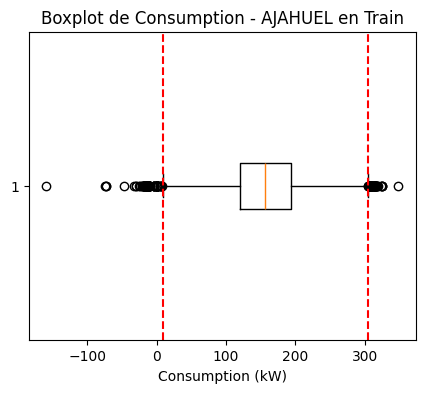

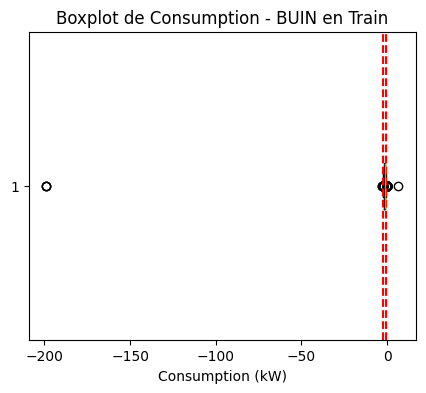

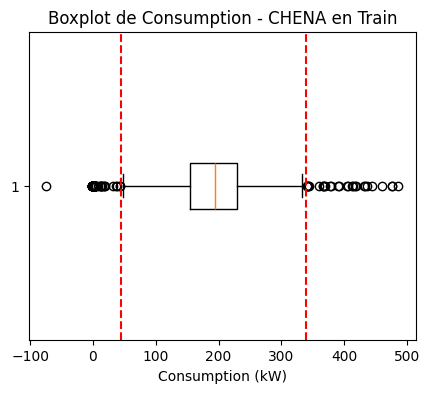

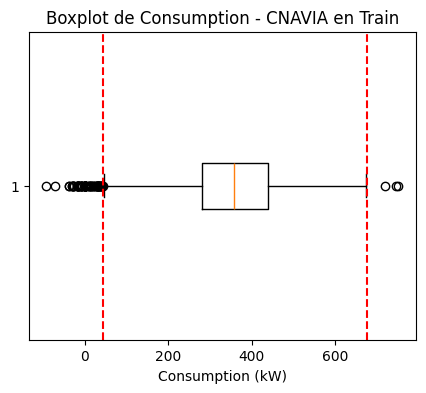

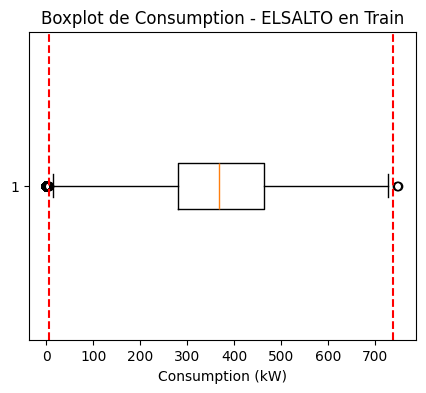

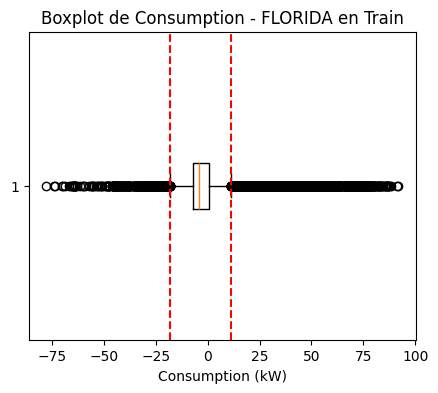

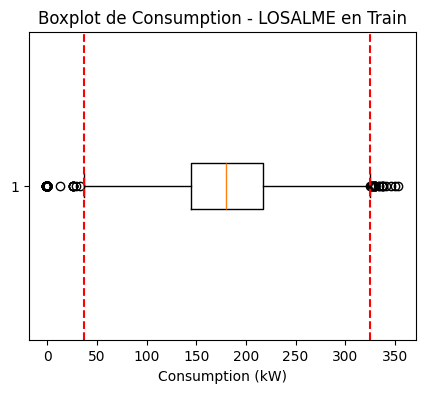

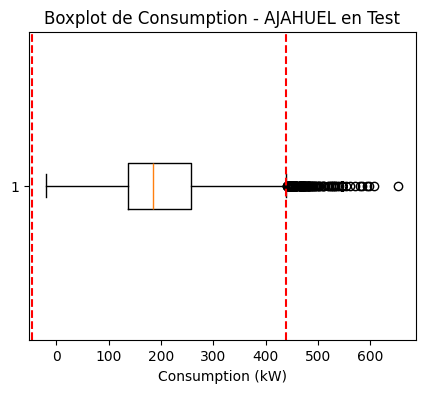

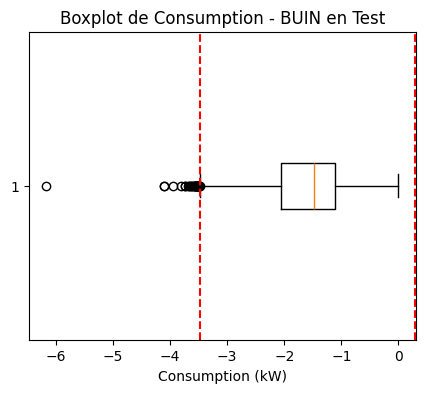

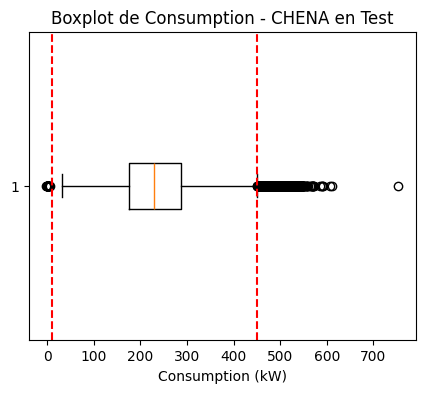

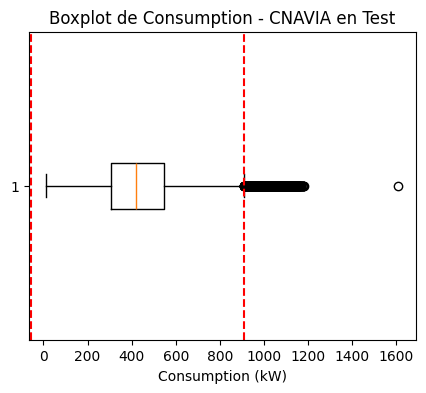

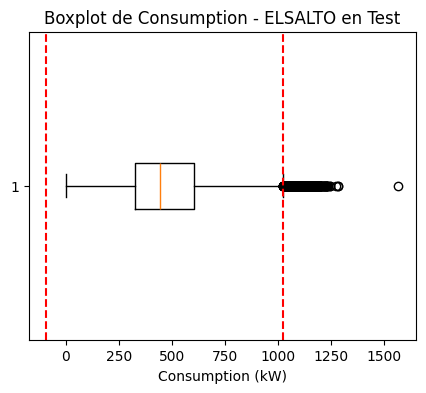

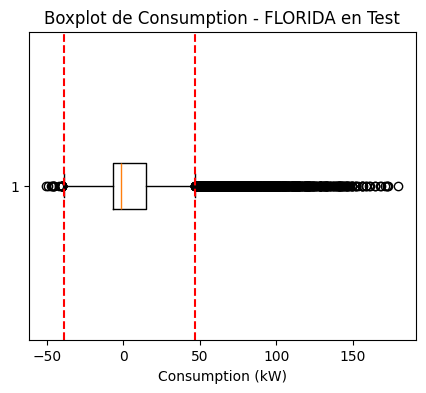

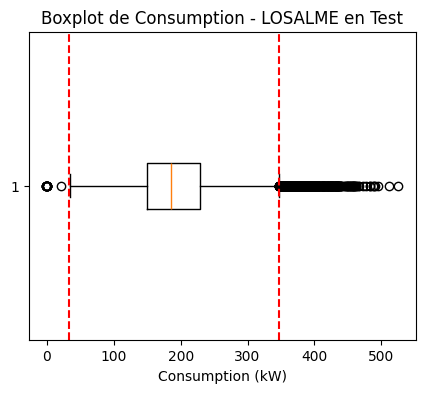

substation          Q1          Q3         IQR  lower_bound  upper_bound  \
0    AJAHUEL  119.854330  193.953513   74.099183     8.705555   305.102289   
1       BUIN   -1.569828   -1.138468    0.431360    -2.216868    -0.491427   
2      CHENA  154.904518  228.849061   73.944543    43.987704   339.765875   
3     CNAVIA  281.036087  439.645029  158.608943    43.122673   677.558443   
4    ELSALTO  280.948017  464.005314  183.057297     6.362072   738.591259   
5    FLORIDA   -6.934194    0.415733    7.349927   -17.959084    11.440623   
6    LOSALME  144.764545  216.802803   72.038258    36.707159   324.860190   

   num_outliers  
0           165  
1           174  
2           310  
3            70  
4           201  
5          2547  
6           135

substation          Q1          Q3         IQR  lower_bound  upper_bound  \
0    AJAHUEL  136.465923  257.711977  121.246054   -45.403158   439.581059   
1       BUIN   -2.060351   -1.117088    0.943263    -3.475245     0.297806   
2      CHENA  176.079637  286.082238  110.002600    11.075737   451.086138   
3     CNAVIA  307.108884  548.070398  240.961514   -54.333387   909.512670   
4    ELSALTO  326.285006  606.093472  279.808466   -93.427693  1025.806172   
5    FLORIDA   -6.915293   14.594991   21.510284   -39.180719    46.860417   
6    LOSALME  150.328084  228.979510   78.651426    32.350945   346.956650   

   num_outliers  
0           140  
1            37  
2           836  
3           672  
4           541  
5          1012  
6           642

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

outliers_info_train = {}
outliers_info_test = {}

# Procesar outliers en train
for sub in unique_subs:
    df_train = train_by_substation[sub]

    Q1_train = df_train['consumption'].quantile(0.25)
    Q3_train = df_train['consumption'].quantile(0.75)
    IQR_train = Q3_train - Q1_train

    lower_bound_train = Q1_train - 1.5 * IQR_train
    upper_bound_train = Q3_train + 1.5 * IQR_train

    outliers_train = df_train[(df_train['consumption'] < lower_bound_train) | (df_train['consumption'] > upper_bound_train)]

    outliers_info_train[sub] = {
        'Q1': Q1_train,
        'Q3': Q3_train,
        'IQR': IQR_train,
        'lower_bound': lower_bound_train,
        'upper_bound': upper_bound_train,
        'num_outliers': len(outliers_train),
        'outliers_sample': outliers_train.head(5)
    }

    plt.figure(figsize=(5, 4))
    plt.boxplot(df_train['consumption'], vert=False)
    plt.title(f"Boxplot de Consumption - {sub} en Train")
    plt.axvline(x=lower_bound_train, color='r', linestyle='--')
    plt.axvline(x=upper_bound_train, color='r', linestyle='--')
    plt.xlabel('Consumption (kW)')
    plt.show()

# Procesar outliers en test
for sub in unique_subs:
    df_test = test_by_substation[sub]

    Q1_test = df_test['consumption'].quantile(0.25)
    Q3_test = df_test['consumption'].quantile(0.75)
    IQR_test = Q3_test - Q1_test

    lower_bound_test = Q1_test - 1.5 * IQR_test
    upper_bound_test = Q3_test + 1.5 * IQR_test

    outliers_test = df_test[(df_test['consumption'] < lower_bound_test) | (df_test['consumption'] > upper_bound_test)]

    outliers_info_test[sub] = {
        'Q1': Q1_test,
        'Q3': Q3_test,
        'IQR': IQR_test,
        'lower_bound': lower_bound_test,
        'upper_bound': upper_bound_test,
        'num_outliers': len(outliers_test),
        'outliers_sample': outliers_test.head(5)
    }

    plt.figure(figsize=(5, 4))
    plt.boxplot(df_test['consumption'], vert=False)
    plt.title(f"Boxplot de Consumption - {sub} en Test")
    plt.axvline(x=lower_bound_test, color='r', linestyle='--')
    plt.axvline(x=upper_bound_test, color='r', linestyle='--')
    plt.xlabel('Consumption (kW)')
    plt.show()

# Resumen de outliers para ambos train y test
outlier_summary_train = pd.DataFrame([
    {
        'substation': sub,
        'Q1': info['Q1'],
        'Q3': info['Q3'],
        'IQR': info['IQR'],
        'lower_bound': info['lower_bound'],
        'upper_bound': info['upper_bound'],
        'num_outliers': info['num_outliers']
    }
    for sub, info in outliers_info_train.items()
])

outlier_summary_test = pd.DataFrame([
    {
        'substation': sub,
        'Q1': info['Q1'],
        'Q3': info['Q3'],
        'IQR': info['IQR'],
        'lower_bound': info['lower_bound'],
        'upper_bound': info['upper_bound'],
        'num_outliers': info['num_outliers']
    }
    for sub, info in outliers_info_test.items()
])

display(outlier_summary_train)
display(outlier_summary_test)

In [11]:
################ Tratamiento de datos y entrenamiento #####################

Prueba ADF para AJAHUEL - p-value: 1.5710749612824263e-18
La serie temporal de AJAHUEL ya es estacionaria.
Prueba ADF para BUIN - p-value: 0.0
La serie temporal de BUIN ya es estacionaria.
Prueba ADF para CHENA - p-value: 2.0666592919854678e-30
La serie temporal de CHENA ya es estacionaria.
Prueba ADF para CNAVIA - p-value: 3.867062607684409e-24
La serie temporal de CNAVIA ya es estacionaria.
Prueba ADF para ELSALTO - p-value: 1.737451875265964e-27
La serie temporal de ELSALTO ya es estacionaria.
Prueba ADF para FLORIDA - p-value: 1.3370485980047415e-19
La serie temporal de FLORIDA ya es estacionaria.
Prueba ADF para LOSALME - p-value: 3.886419162873882e-20
La serie temporal de LOSALME ya es estacionaria.


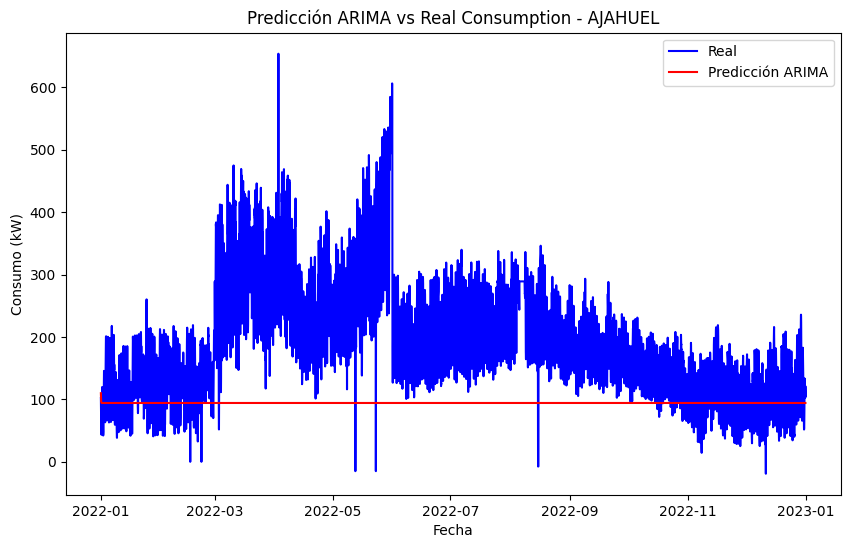

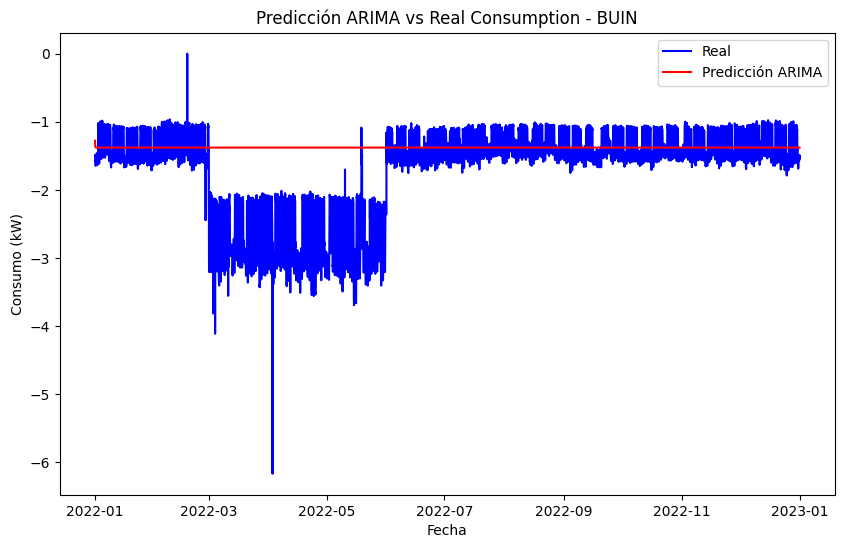

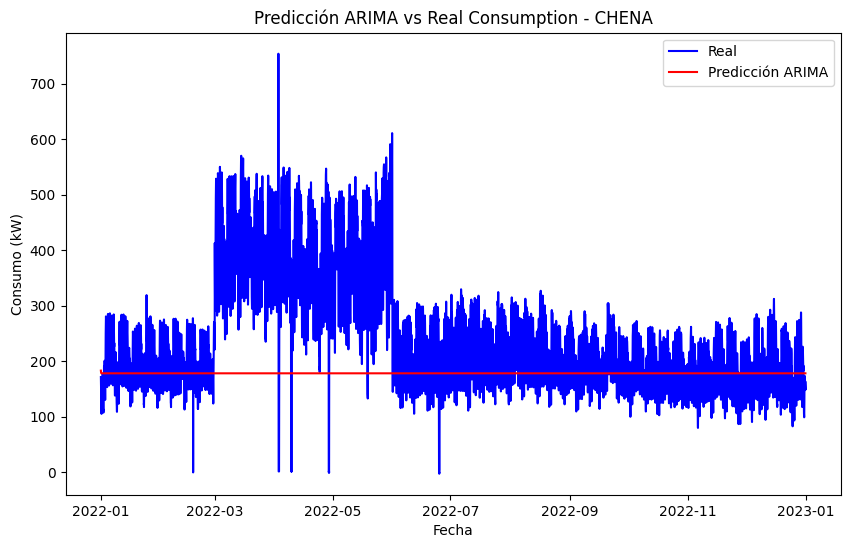

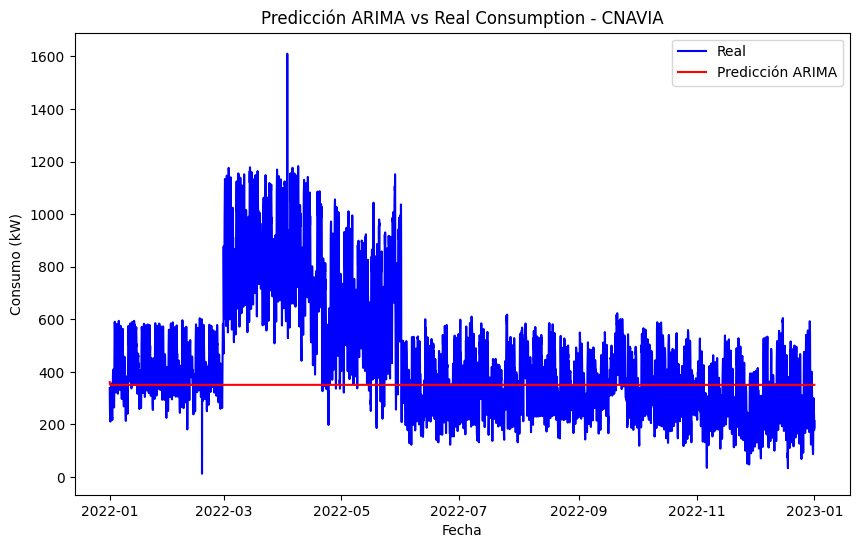

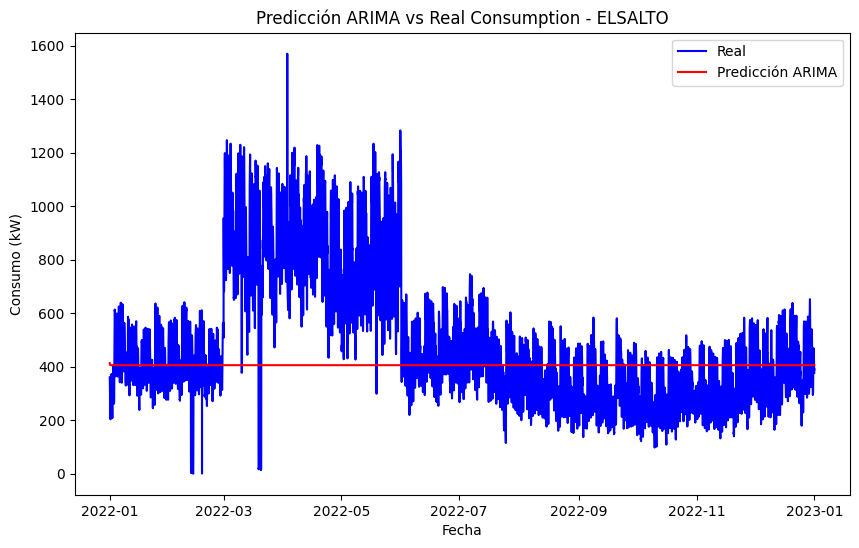

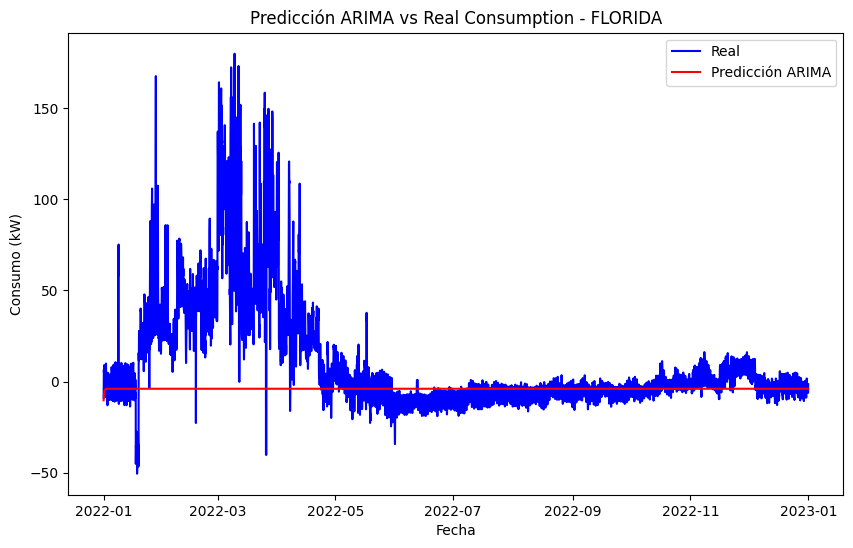

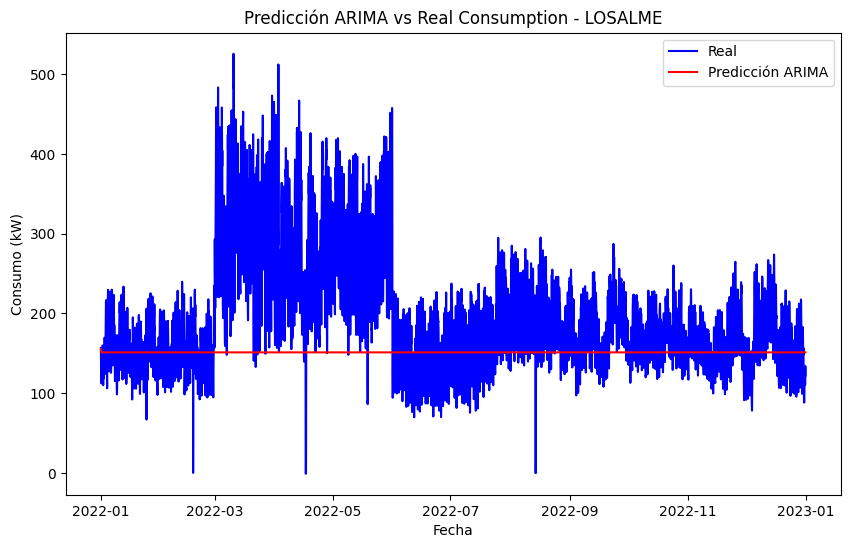

substation         MAE           MSE        RMSE  MAPE
0    AJAHUEL  112.873996  20180.223575  142.057114   NaN
1       BUIN    0.478359      0.522661    0.722953   NaN
2      CHENA   91.319821  16863.351253  129.858967   NaN
3     CNAVIA  181.810057  67669.383152  260.133395   NaN
4    ELSALTO  191.990588  73802.486166  271.666130   NaN
5    FLORIDA   18.293649   1108.946430   33.300847   NaN
6    LOSALME   63.883042   8210.906555   90.614053   NaN

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

for sub in unique_subs:
    df_train = train_by_substation[sub]

    result = adfuller(df_train['consumption'])
    print(f"Prueba ADF para {sub} - p-value: {result[1]}")
    if result[1] > 0.05:
        print(f"La serie temporal de {sub} no es estacionaria. Aplicando diferenciación.")
        df_train['consumption'] = df_train['consumption'].diff().dropna()
    else:
        print(f"La serie temporal de {sub} ya es estacionaria.")

    df_train['consumption'].fillna(df_train['consumption'].mean(), inplace=True)

metrics = []

for sub in unique_subs:
    df_train = train_by_substation[sub]

    model = ARIMA(df_train['consumption'], order=(1, 1, 1))
    model_fit = model.fit()

    df_test = test_by_substation[sub]
    predictions = model_fit.forecast(steps=len(df_test))

    mae = mean_absolute_error(df_test['consumption'], predictions)
    mse = mean_squared_error(df_test['consumption'], predictions)
    rmse = np.sqrt(mse)

    mape = np.nan

    metrics.append({
        'substation': sub,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    })

    plt.figure(figsize=(10, 6))
    plt.plot(df_test['date'], df_test['consumption'], label='Real', color='blue')
    plt.plot(df_test['date'], predictions, label='Predicción ARIMA', color='red')
    plt.title(f"Predicción ARIMA vs Real Consumption - {sub}")
    plt.xlabel("Fecha")
    plt.ylabel("Consumo (kW)")
    plt.legend()
    plt.show()

metrics_df = pd.DataFrame(metrics)
display(metrics_df)

In [13]:
################# pruebas cruzadas #####################

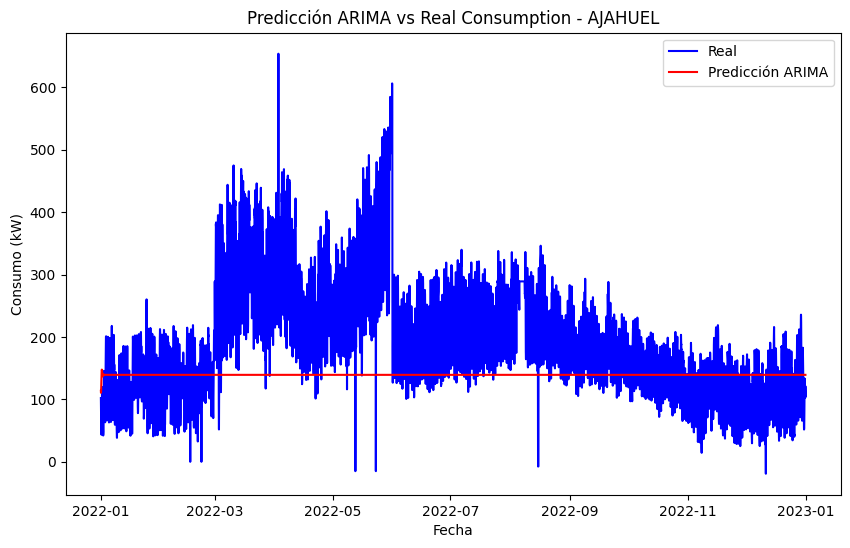

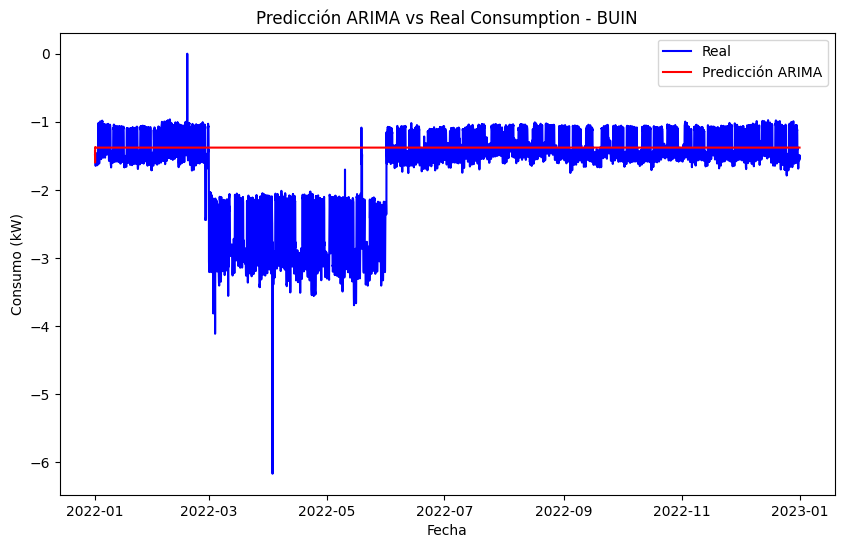

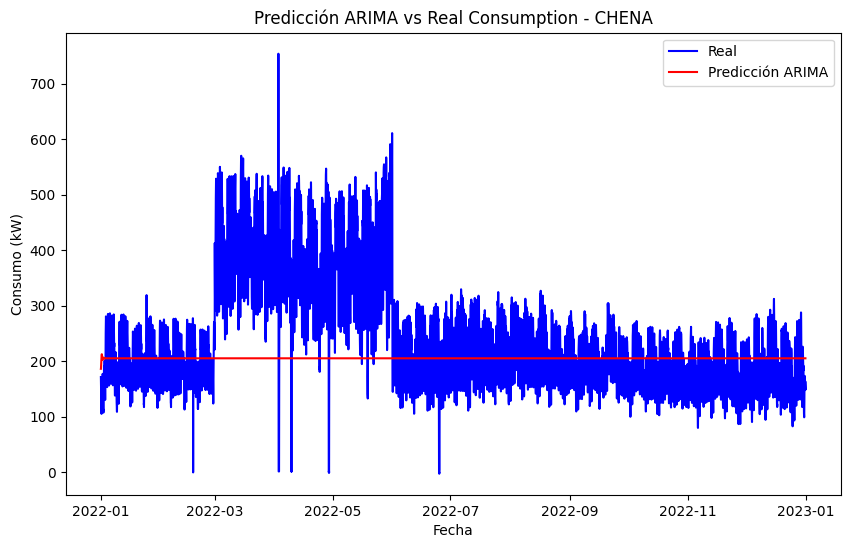

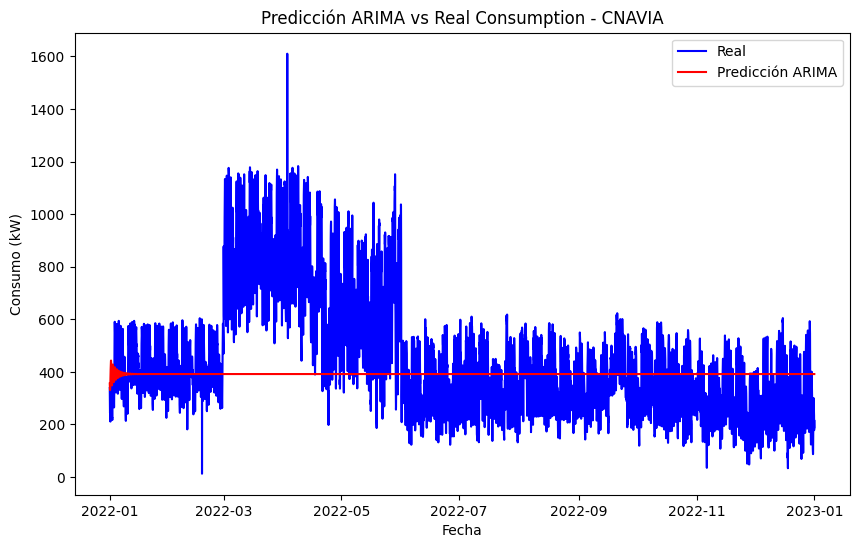

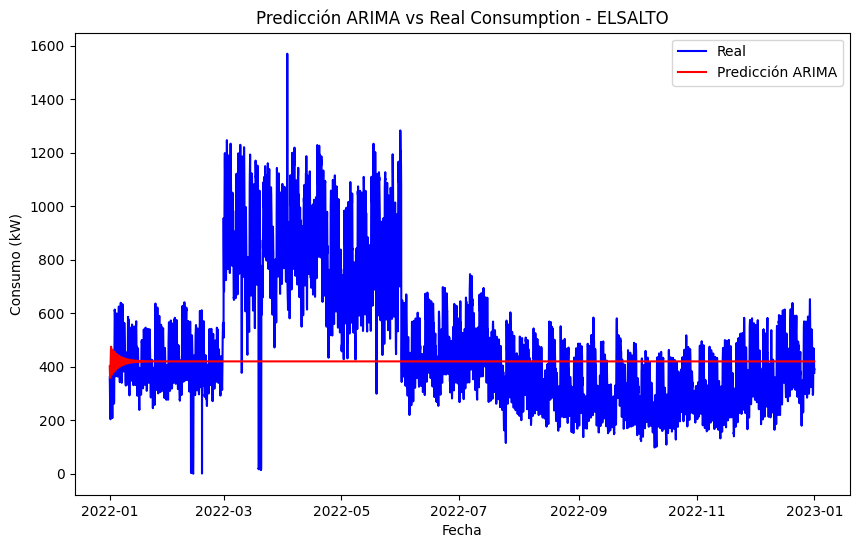

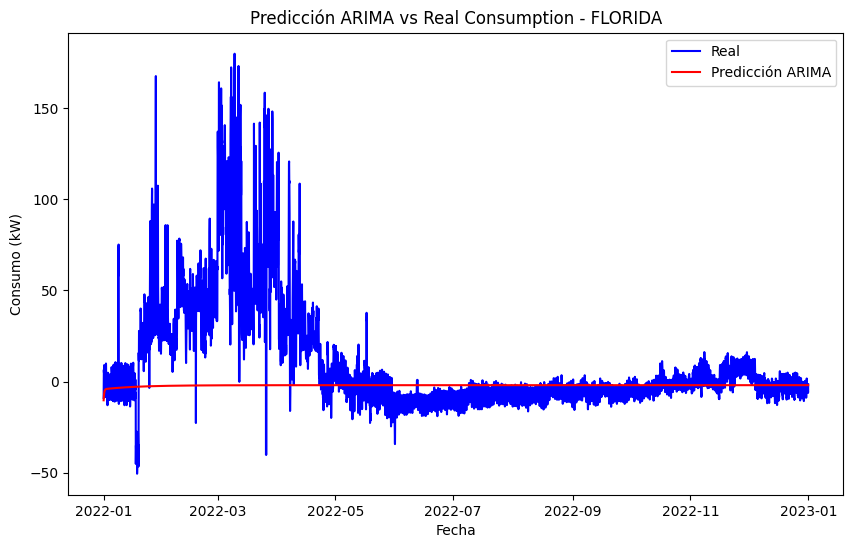

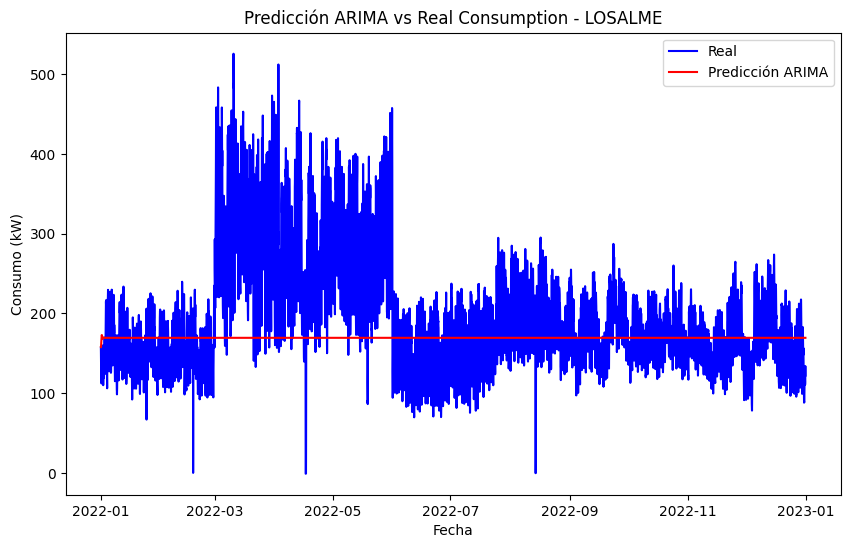

substation Best Parameters (p, d, q)            AIC         MAE  \
0    AJAHUEL                 (2, 1, 2)  274074.521235   83.402527   
1       BUIN                 (1, 0, 2)  107718.358133    0.478318   
2      CHENA                 (2, 1, 2)  288526.923866   81.593810   
3     CNAVIA                 (2, 1, 2)  335033.932290  172.571156   
4    ELSALTO                 (2, 1, 2)  333101.509091  189.895172   
5    FLORIDA                 (2, 0, 1)  196322.564514   18.143823   
6    LOSALME                 (2, 1, 2)  279920.529697   57.198616   

            MSE        RMSE  
0  12595.951362  112.231686  
1      0.522670    0.722959  
2  13590.305388  116.577465  
3  59757.414771  244.453298  
4  71115.587418  266.675060  
5   1061.091638   32.574402  
6   6700.463520   81.856359

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

def grid_search_arima(train_data, test_data, p_values, d_values, q_values):
    best_model = None
    best_aic = float('inf')  # Iniciar con un AIC muy alto
    best_params = None
    best_predictions = None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:

                    model = ARIMA(train_data, order=(p, d, q))
                    model_fit = model.fit()

                    predictions = model_fit.forecast(steps=len(test_data))

                    aic = model_fit.aic

                    if aic < best_aic:
                        best_aic = aic
                        best_model = model_fit
                        best_params = (p, d, q)
                        best_predictions = predictions

                except Exception as e:
                    continue

    return best_model, best_params, best_predictions, best_aic

p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

metrics = []

for sub in unique_subs:
    df_train = train_by_substation[sub]
    df_test = test_by_substation[sub]

    best_model, best_params, best_predictions, best_aic = grid_search_arima(df_train['consumption'], df_test['consumption'], p_values, d_values, q_values)

    if best_model is not None:

        mae = mean_absolute_error(df_test['consumption'], best_predictions)
        mse = mean_squared_error(df_test['consumption'], best_predictions)
        rmse = np.sqrt(mse)

        metrics.append({
            'substation': sub,
            'Best Parameters (p, d, q)': best_params,
            'AIC': best_aic,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse
        })

        plt.figure(figsize=(10, 6))
        plt.plot(df_test['date'], df_test['consumption'], label='Real', color='blue')
        plt.plot(df_test['date'], best_predictions, label='Predicción ARIMA', color='red')
        plt.title(f"Predicción ARIMA vs Real Consumption - {sub}")
        plt.xlabel("Fecha")
        plt.ylabel("Consumo (kW)")
        plt.legend()
        plt.show()

metrics_df = pd.DataFrame(metrics)
display(metrics_df)

In [15]:
############## Validación Cruzada con TimeSeriesSplit #################

MAE promedio: 46.439026232824396
MSE promedio: 3380.132115518053
RMSE promedio: 56.994588761472116


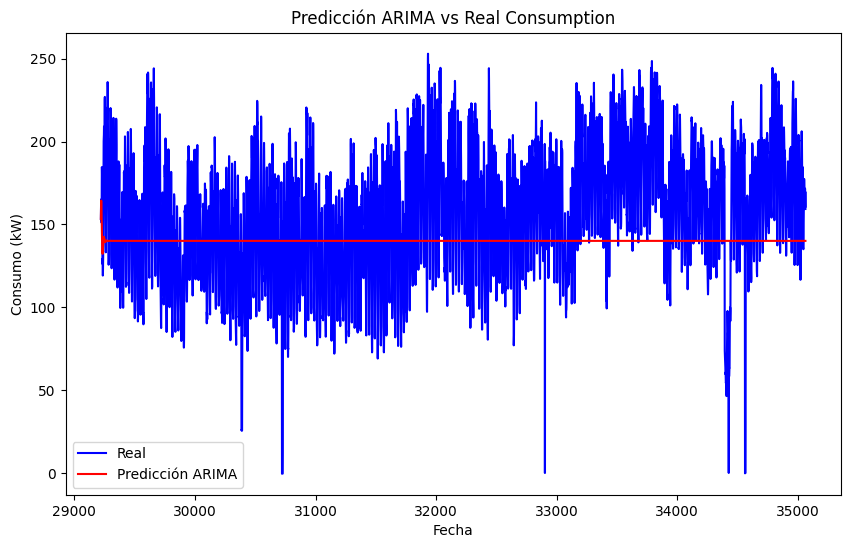

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

p, d, q = 2, 1, 2

data = df_train['consumption'].reset_index(drop=True)

tscv = TimeSeriesSplit(n_splits=5)

mae_scores = []
mse_scores = []
rmse_scores = []

for train_index, test_index in tscv.split(data):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]

    model = ARIMA(train_data, order=(p, d, q))
    model_fit = model.fit()

    predictions = model_fit.forecast(steps=len(test_data))

    mae = mean_absolute_error(test_data, predictions)
    mse = mean_squared_error(test_data, predictions)
    rmse = np.sqrt(mse)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

print(f"MAE promedio: {np.mean(mae_scores)}")
print(f"MSE promedio: {np.mean(mse_scores)}")
print(f"RMSE promedio: {np.mean(rmse_scores)}")

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Real', color='blue')
plt.plot(test_data.index, predictions, label='Predicción ARIMA', color='red')
plt.title("Predicción ARIMA vs Real Consumption")
plt.xlabel("Fecha")
plt.ylabel("Consumo (kW)")
plt.legend()
plt.show()

In [17]:
################### SARIMA ######################

MAE promedio: 103.93482982707346
MSE promedio: 21981.284914822434
RMSE promedio: 116.61138253061768


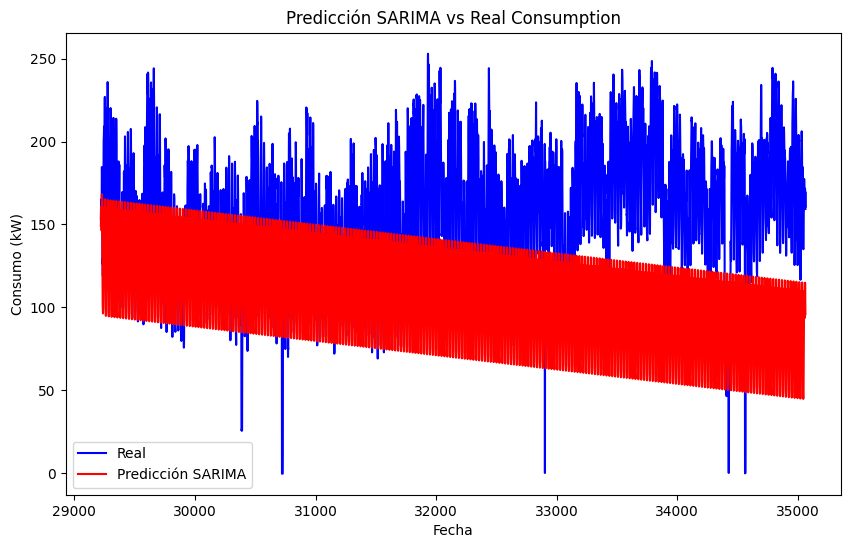

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

p, d, q = 2, 1, 2
P, D, Q, s = 2, 1, 2, 24

data = df_train['consumption'].reset_index(drop=True)

tscv = TimeSeriesSplit(n_splits=5)

mae_scores = []
mse_scores = []
rmse_scores = []

for train_index, test_index in tscv.split(data):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]

    model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
    model_fit = model.fit(disp=False)

    predictions = model_fit.forecast(steps=len(test_data))

    mae = mean_absolute_error(test_data, predictions)
    mse = mean_squared_error(test_data, predictions)
    rmse = np.sqrt(mse)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

print(f"MAE promedio: {np.mean(mae_scores)}")
print(f"MSE promedio: {np.mean(mse_scores)}")
print(f"RMSE promedio: {np.mean(rmse_scores)}")

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Real', color='blue')
plt.plot(test_data.index, predictions, label='Predicción SARIMA', color='red')
plt.title("Predicción SARIMA vs Real Consumption")
plt.xlabel("Fecha")
plt.ylabel("Consumo (kW)")
plt.legend()
plt.show()

In [ ]:
############## pruebas con diferentes prámetros ####################

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from itertools import product

param_grid = {
    'p': [1, 2, 3],
    'd': [0, 1],
    'q': [1, 2, 3],
    'P': [0, 1, 2],
    'D': [0, 1],
    'Q': [0, 1, 2],
    's': [24]
}

param_combinations = list(product(param_grid['p'], param_grid['d'], param_grid['q'], param_grid['P'], param_grid['D'], param_grid['Q'], param_grid['s']))

best_mae = float('inf')
best_params = None
best_model = None

train_data = df_train['consumption'].reset_index(drop=True)
test_data = df_test['consumption'].reset_index(drop=True)

for p, d, q, P, D, Q, s in param_combinations:
    try:
        print(f"Entrenando SARIMA con parámetros: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")

        model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
        model_fit = model.fit(disp=False)

        predictions = model_fit.forecast(steps=len(test_data))

        mae = mean_absolute_error(test_data, predictions)
        mse = mean_squared_error(test_data, predictions)
        rmse = np.sqrt(mse)

        if mae < best_mae:
            best_mae = mae
            best_params = (p, d, q, P, D, Q, s)
            best_model = model_fit

        print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

    except Exception as e:
        print(f"Error con los parámetros: {p}, {d}, {q}, {P}, {D}, {Q}, {s} - {e}")

print("\nMejores parámetros encontrados:", best_params)
print("Mejor MAE:", best_mae)

predictions = best_model.forecast(steps=len(test_data))

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Real', color='blue')
plt.plot(test_data.index, predictions, label='Predicción SARIMA', color='red')
plt.title("Predicción SARIMA vs Real Consumption")
plt.xlabel("Fecha")
plt.ylabel("Consumo (kW)")
plt.legend()
plt.show()

Entrenando SARIMA con parámetros: p=1, d=0, q=1, P=0, D=0, Q=0, s=24
MAE: 198.64824702483162, MSE: 45577.95501237324, RMSE: 213.48994124401563
Entrenando SARIMA con parámetros: p=1, d=0, q=1, P=0, D=0, Q=1, s=24
MAE: 199.21358677431024, MSE: 45721.488864229694, RMSE: 213.8258376909341
Entrenando SARIMA con parámetros: p=1, d=0, q=1, P=0, D=0, Q=2, s=24
MAE: 199.57443465549906, MSE: 45820.06836269141, RMSE: 214.05622710561684
Entrenando SARIMA con parámetros: p=1, d=0, q=1, P=0, D=1, Q=0, s=24
MAE: 57.114164073405504, MSE: 7092.7225953109255, RMSE: 84.21830320845301
Entrenando SARIMA con parámetros: p=1, d=0, q=1, P=0, D=1, Q=1, s=24
MAE: 49.23113327795997, MSE: 5418.297825398353, RMSE: 73.60908792668438
Entrenando SARIMA con parámetros: p=1, d=0, q=1, P=0, D=1, Q=2, s=24
MAE: 49.30491551906836, MSE: 5441.741276257626, RMSE: 73.76815895938861
Entrenando SARIMA con parámetros: p=1, d=0, q=1, P=1, D=0, Q=0, s=24
MAE: 200.03012913830875, MSE: 45940.934080364255, RMSE: 214.3383635291738
Ent

KeyboardInterrupt: 

Entrenando SARIMA con parámetros: p=1, d=0, q=1, P=0, D=1, Q=1, s=24


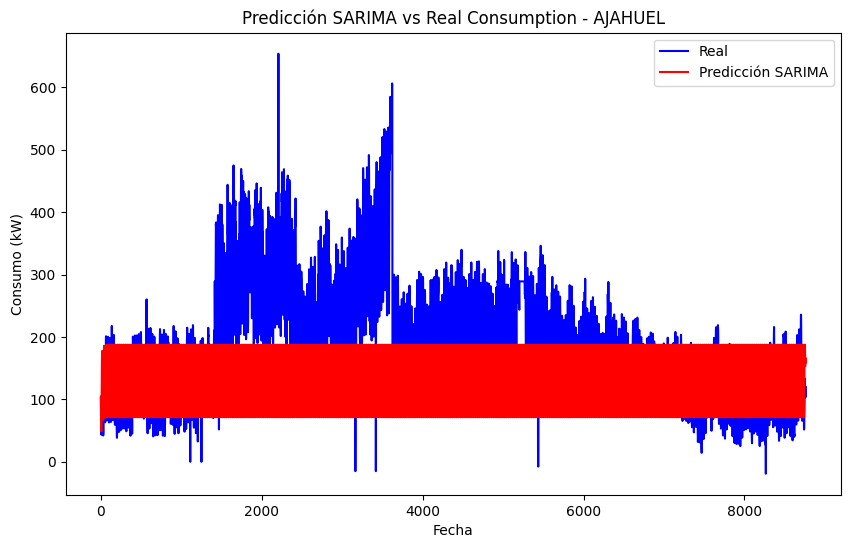

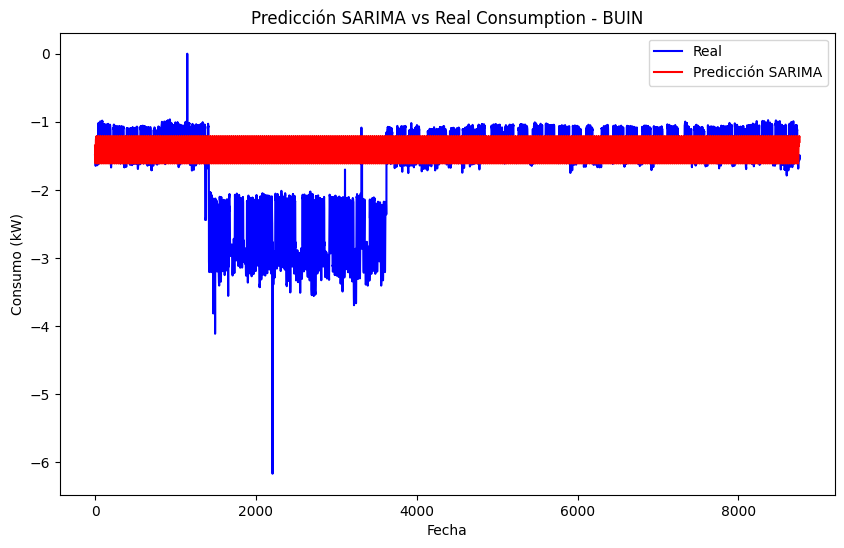

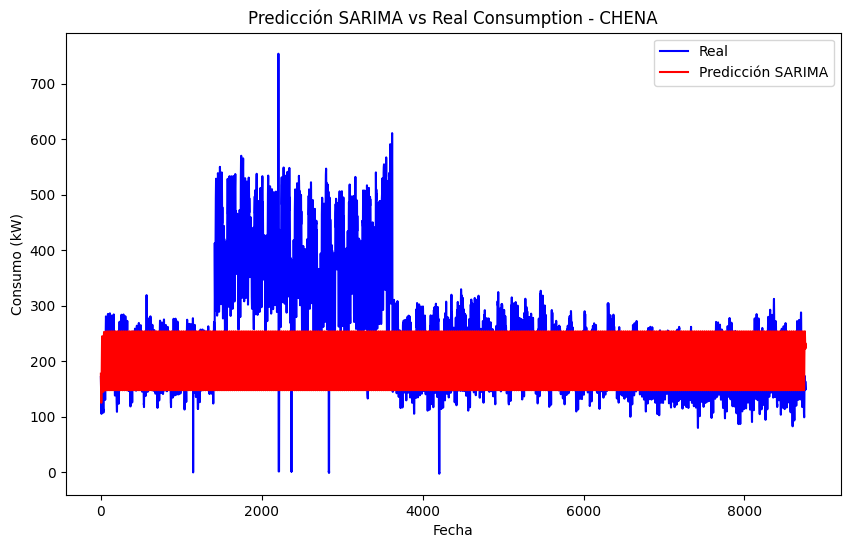

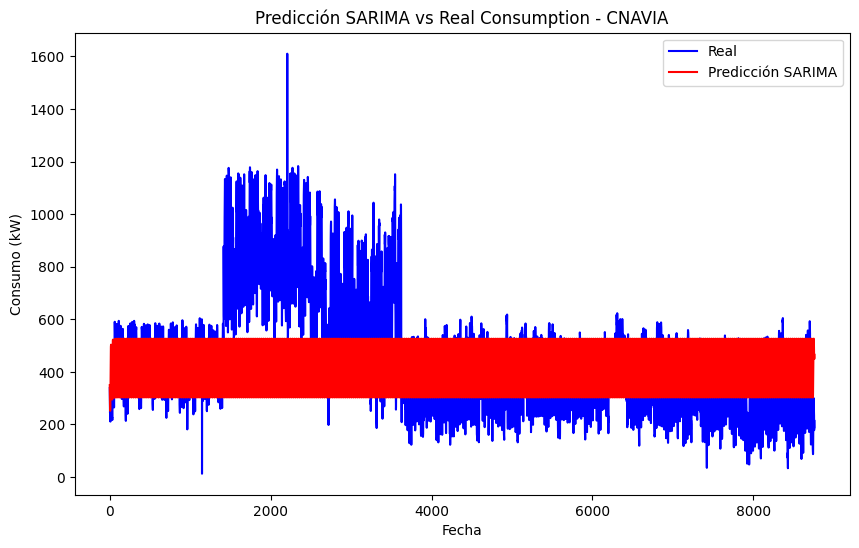

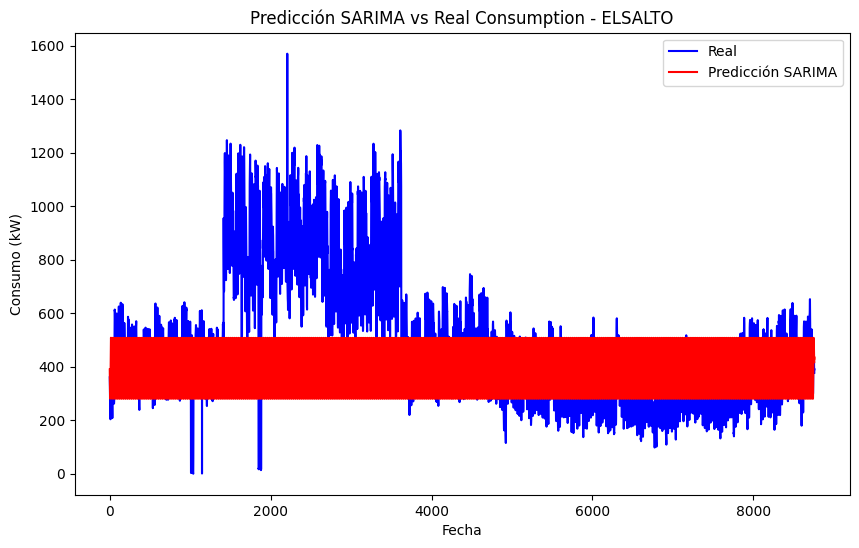

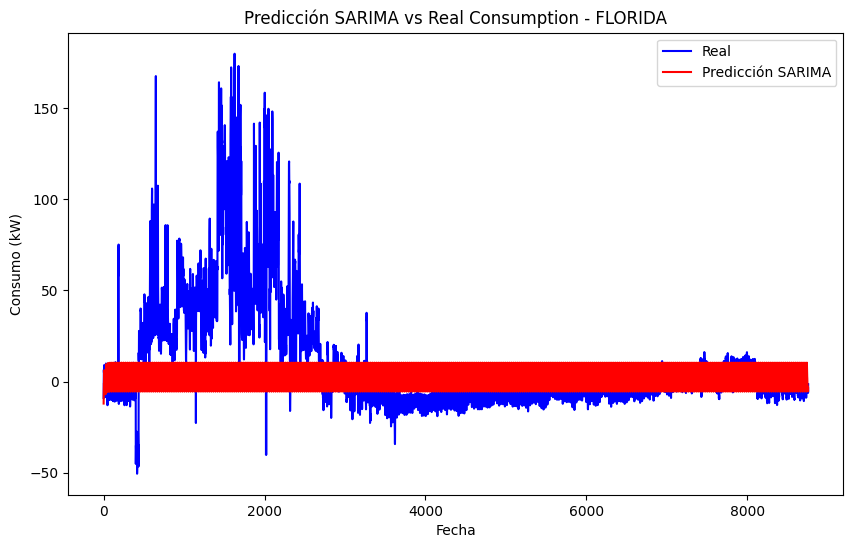

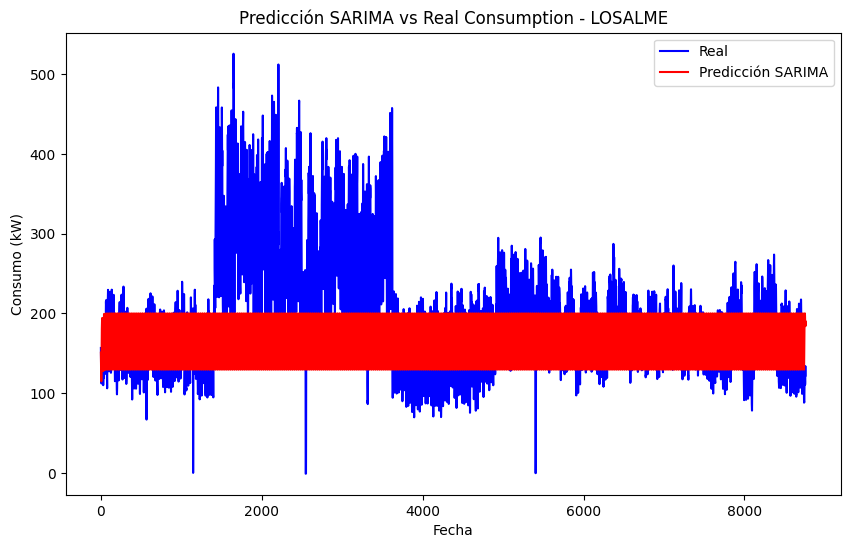

Entrenando SARIMA con parámetros: p=1, d=0, q=1, P=1, D=1, Q=0, s=24


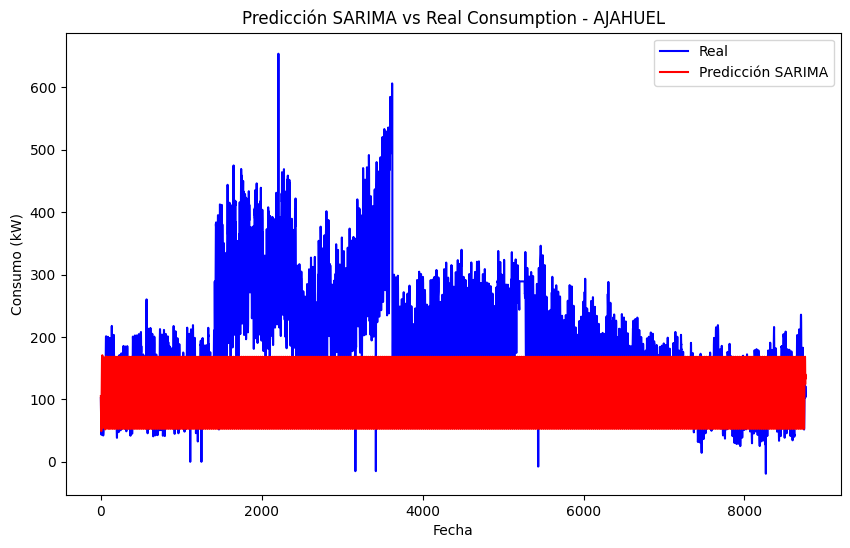

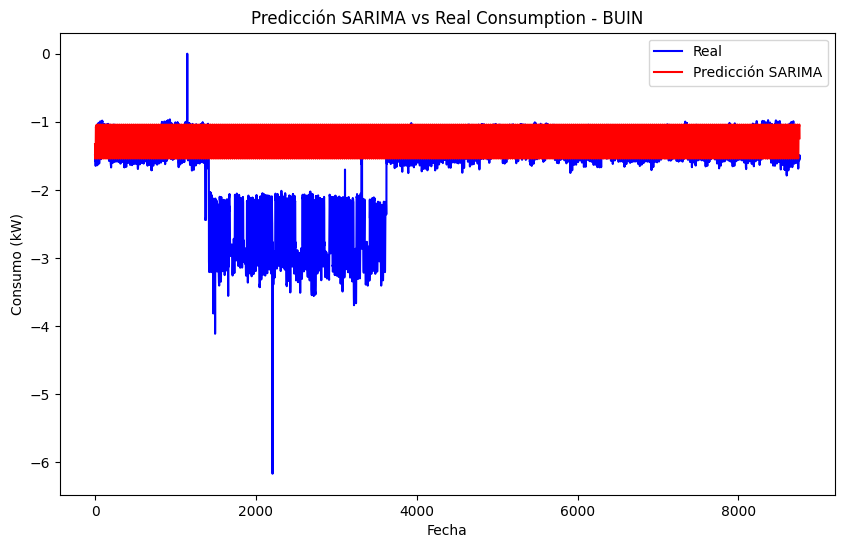

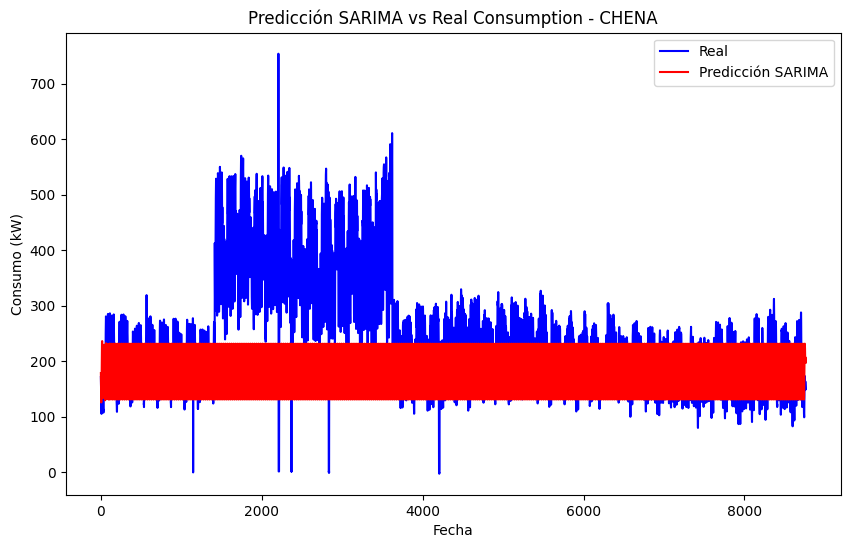

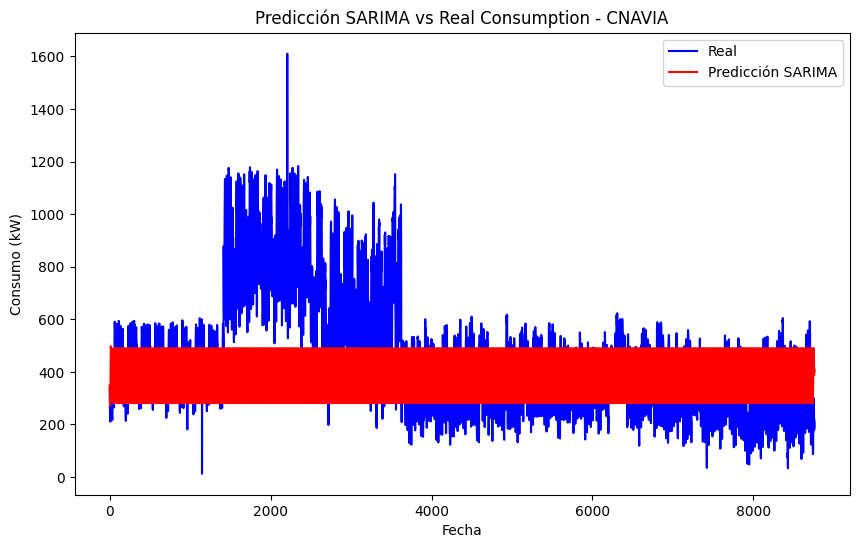

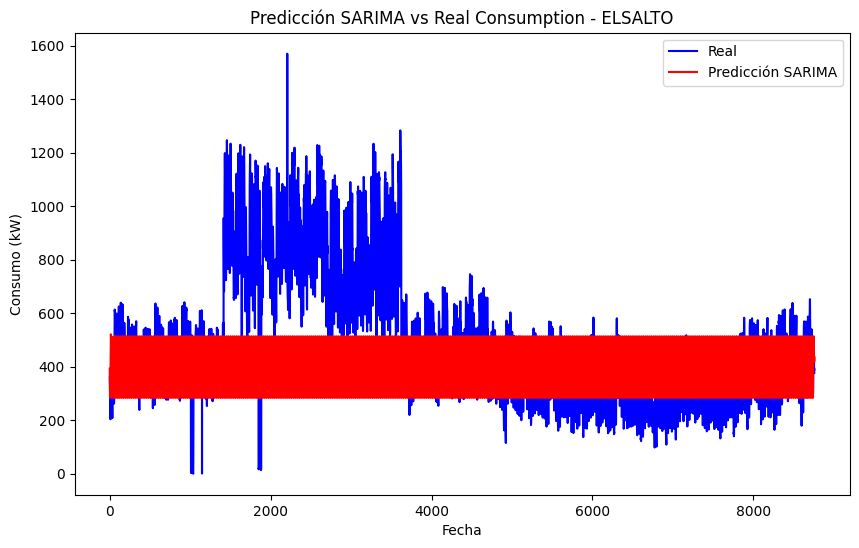

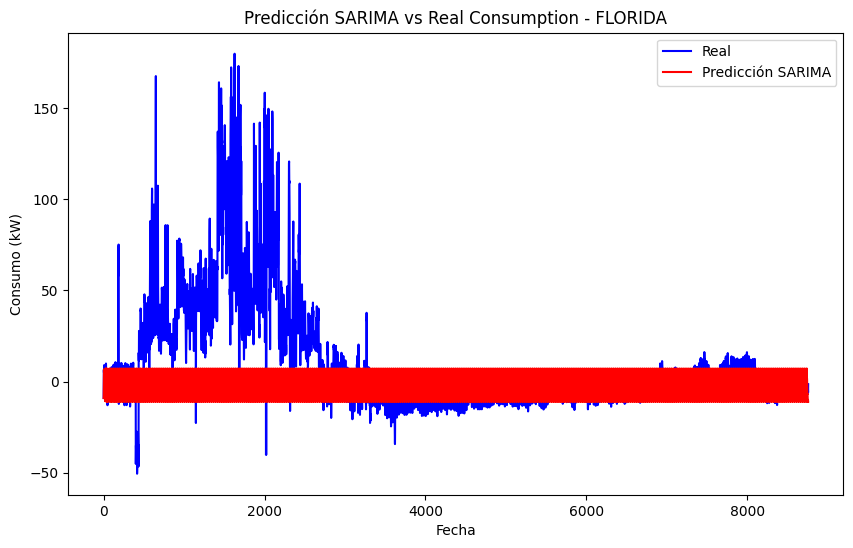

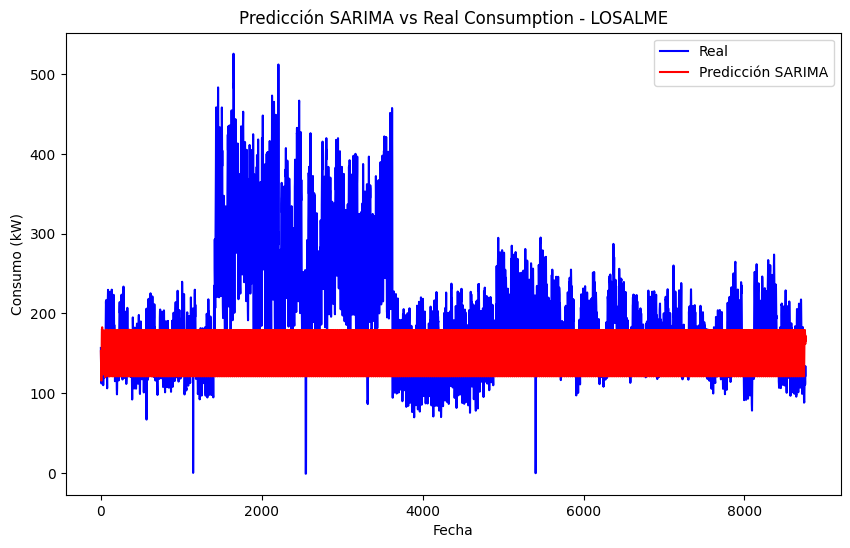

Entrenando SARIMA con parámetros: p=1, d=0, q=1, P=1, D=1, Q=1, s=24


KeyboardInterrupt: 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore")

combinations_to_try = [
    (1, 0, 1, 0, 1, 1, 24),
    (1, 0, 1, 1, 1, 0, 24),
    (1, 0, 1, 1, 1, 1, 24),
    (1, 0, 2, 0, 1, 1, 24),
    (1, 0, 2, 1, 1, 0, 24),
    (1, 0, 2, 1, 1, 1, 24),
    (1, 0, 2, 2, 1, 0, 24),
    (1, 0, 2, 2, 1, 1, 24),
    (2, 0, 1, 0, 1, 1, 24),
    (2, 0, 1, 1, 1, 0, 24),
    (2, 0, 1, 1, 1, 1, 24),
    (2, 0, 2, 0, 1, 1, 24),
    (2, 0, 2, 1, 1, 0, 24),
    (2, 0, 2, 1, 1, 1, 24),
    (2, 0, 2, 2, 1, 0, 24),
    (2, 0, 2, 2, 1, 1, 24)
]

results = []

for p, d, q, P, D, Q, s in combinations_to_try:
    print(f"Entrenando SARIMA con parámetros: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")
    
    for sub in unique_subs:
        train_data = train_by_substation[sub]['consumption']
        test_data = test_by_substation[sub]['consumption']

        try:

            model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
            model_fit = model.fit(disp=False)
            
            predictions = model_fit.forecast(steps=len(test_data))

            mae = mean_absolute_error(test_data, predictions)
            mse = mean_squared_error(test_data, predictions)
            rmse = np.sqrt(mse)

            results.append({
                'substation': sub,
                'p': p,
                'd': d,
                'q': q,
                'P': P,
                'D': D,
                'Q': Q,
                's': s,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse
            })

            plt.figure(figsize=(10, 6))
            plt.plot(test_data.index, test_data, label='Real', color='blue')
            plt.plot(test_data.index, predictions, label='Predicción SARIMA', color='red')
            plt.title(f"Predicción SARIMA vs Real Consumption - {sub}")
            plt.xlabel("Fecha")
            plt.ylabel("Consumo (kW)")
            plt.legend()
            plt.show()
        
        except Exception as e:
            print(f"Error con los parámetros: {p}, {d}, {q}, {P}, {D}, {Q}, {s} en la subestación {sub} - {str(e)}")

results_df = pd.DataFrame(results)

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(results_df[['MAE', 'MSE', 'RMSE']].sort_values('RMSE', ascending=True).set_index('RMSE'), annot=True, cmap="coolwarm")
plt.title("Métricas de Evaluación por Combinación de Parámetros")
plt.show()

print(results_df.sort_values('RMSE'))

In [ ]:
################# tratamiento de outliers #####################

In [20]:
import pandas as pd
import numpy as np

def remove_outliers(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_filtered

for sub in unique_subs:

    df_train_sub = train_by_substation[sub]
    df_train_cleaned = remove_outliers(df_train_sub, 'consumption')
    train_by_substation[sub] = df_train_cleaned

    df_test_sub = test_by_substation[sub]
    df_test_cleaned = remove_outliers(df_test_sub, 'consumption')
    test_by_substation[sub] = df_test_cleaned

In [ ]:
#################### ARIMA mejores resultados anteriores #######################

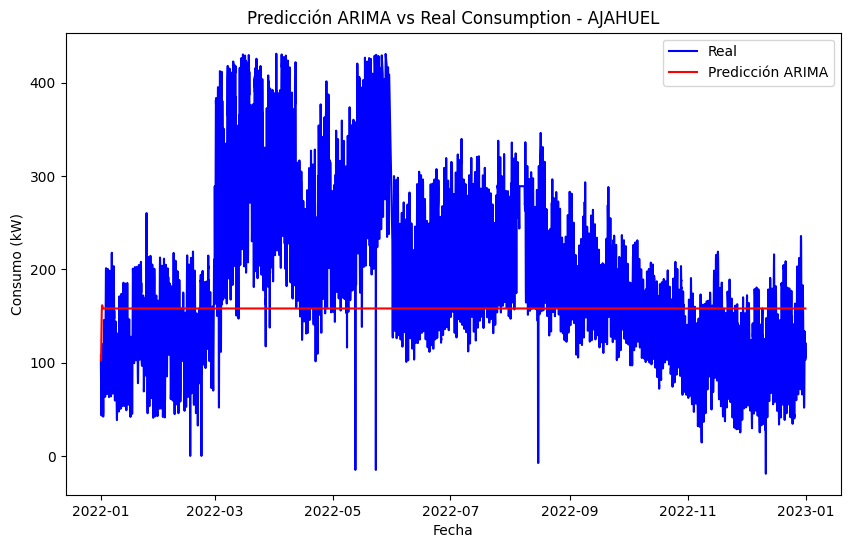

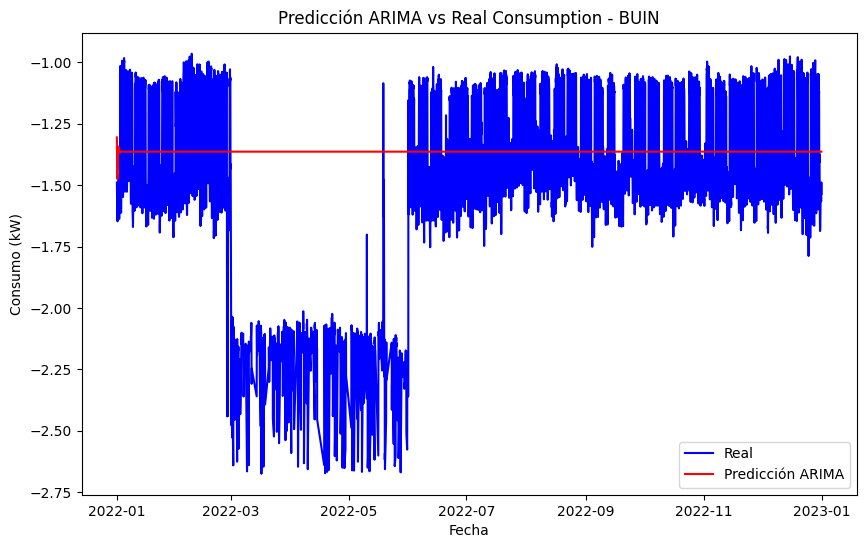

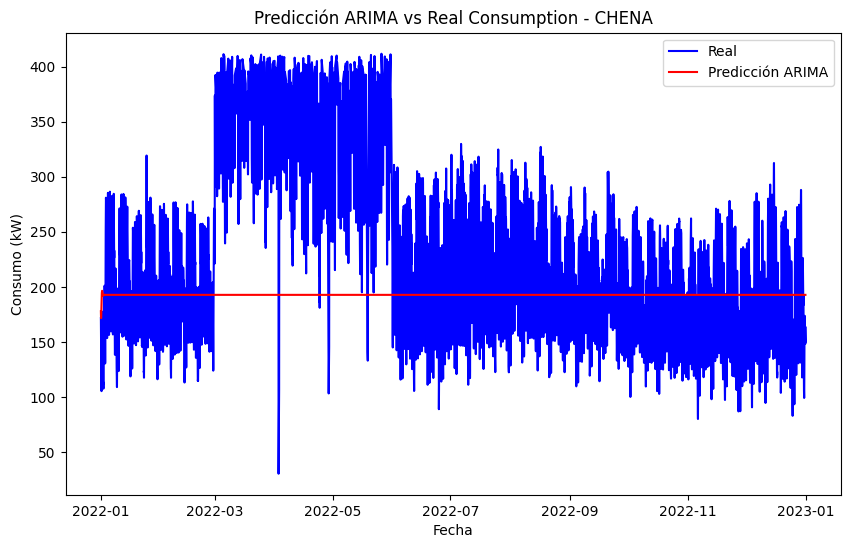

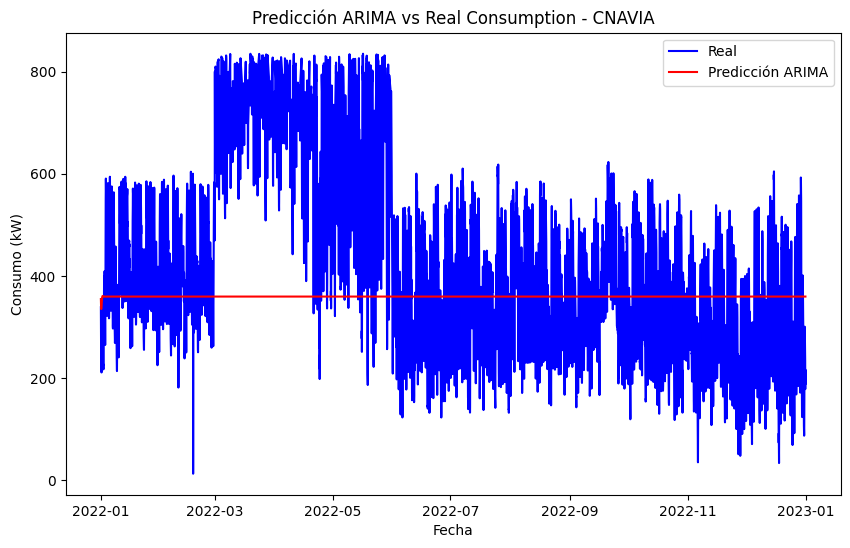

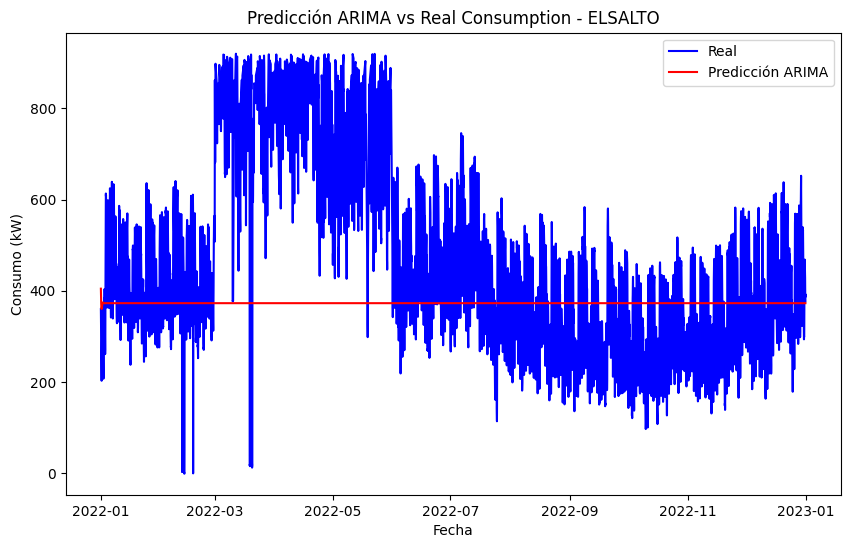

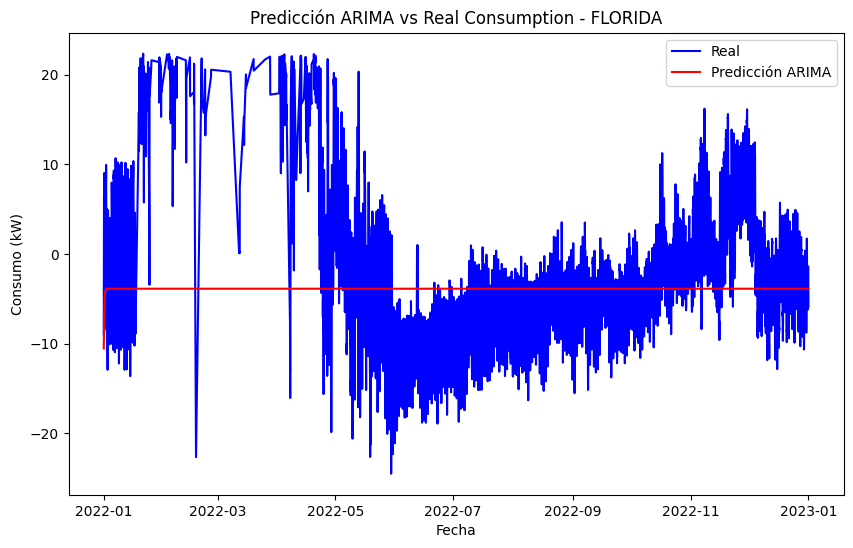

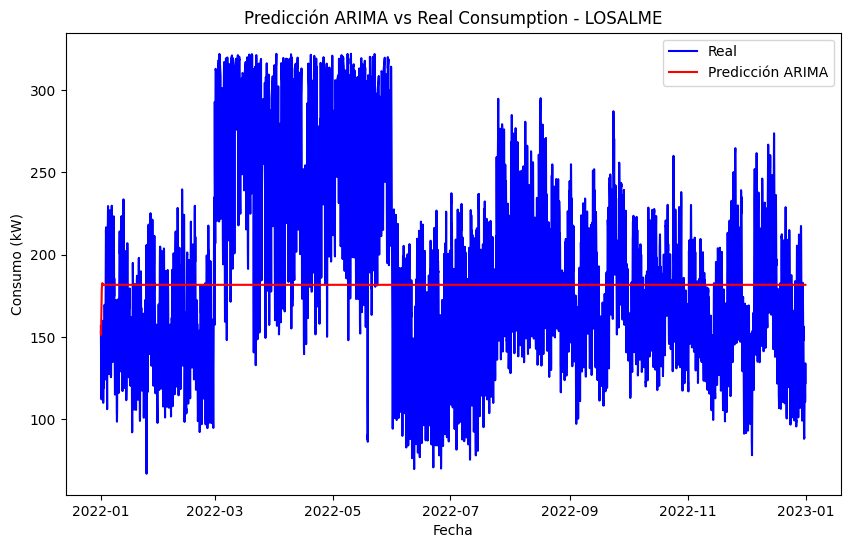

substation         MAE           MSE        RMSE
0    AJAHUEL   71.523499   8777.048073   93.685901
1       BUIN    0.283211      0.136511    0.369473
2      CHENA   56.572136   5255.750180   72.496553
3     CNAVIA  127.152491  26618.900893  163.152998
4    ELSALTO  140.476960  34424.064867  185.537233
5    FLORIDA    5.866306     62.430062    7.901270
6    LOSALME   40.007262   2538.749667   50.386007

In [22]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

results_arima = []

p, d, q = 2, 0, 2 

for sub in unique_subs:

    df_train = train_by_substation[sub]

    model = ARIMA(df_train['consumption'], order=(p, d, q))
    model_fit = model.fit()

    df_test = test_by_substation[sub]

    predictions = model_fit.forecast(steps=len(df_test))

    mae = mean_absolute_error(df_test['consumption'], predictions)
    mse = mean_squared_error(df_test['consumption'], predictions)
    rmse = np.sqrt(mse)

    results_arima.append({
        'substation': sub,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

    plt.figure(figsize=(10, 6))
    plt.plot(df_test['date'], df_test['consumption'], label='Real', color='blue')
    plt.plot(df_test['date'], predictions, label='Predicción ARIMA', color='red')
    plt.title(f"Predicción ARIMA vs Real Consumption - {sub}")
    plt.xlabel("Fecha")
    plt.ylabel("Consumo (kW)")
    plt.legend()
    plt.show()

results_arima_df = pd.DataFrame(results_arima)
display(results_arima_df)

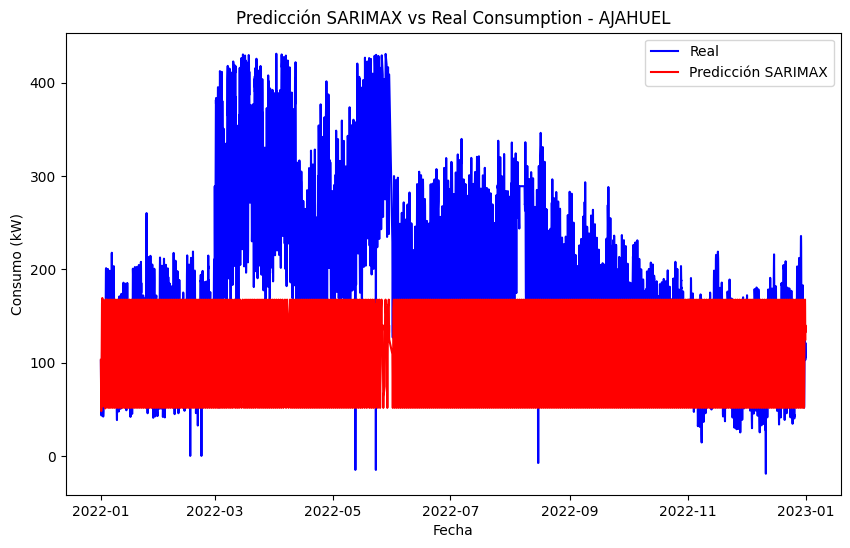

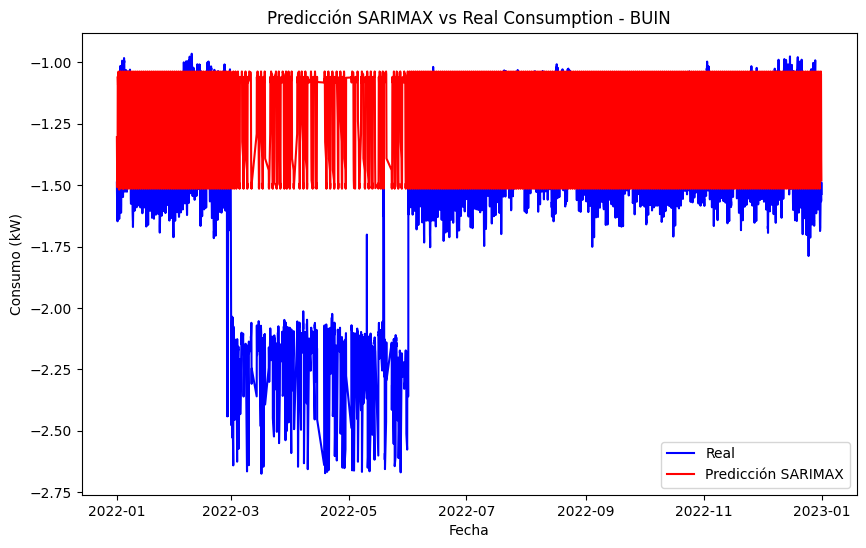

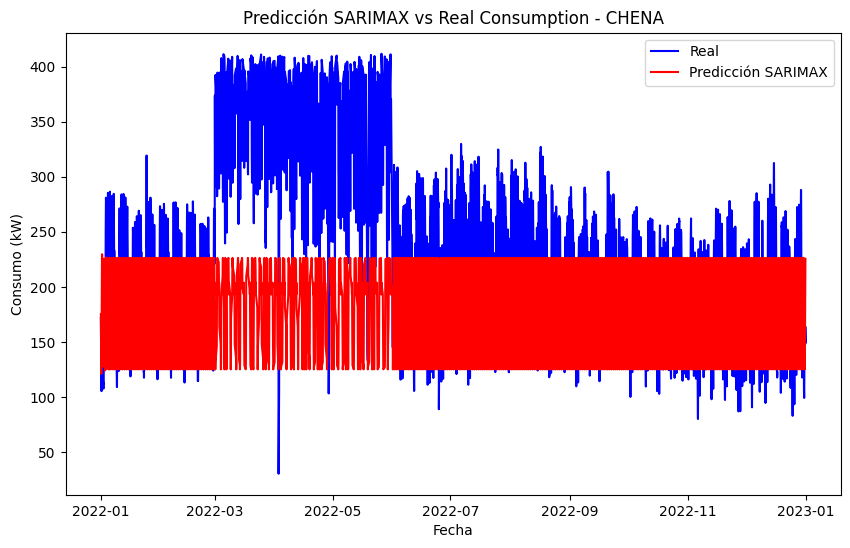

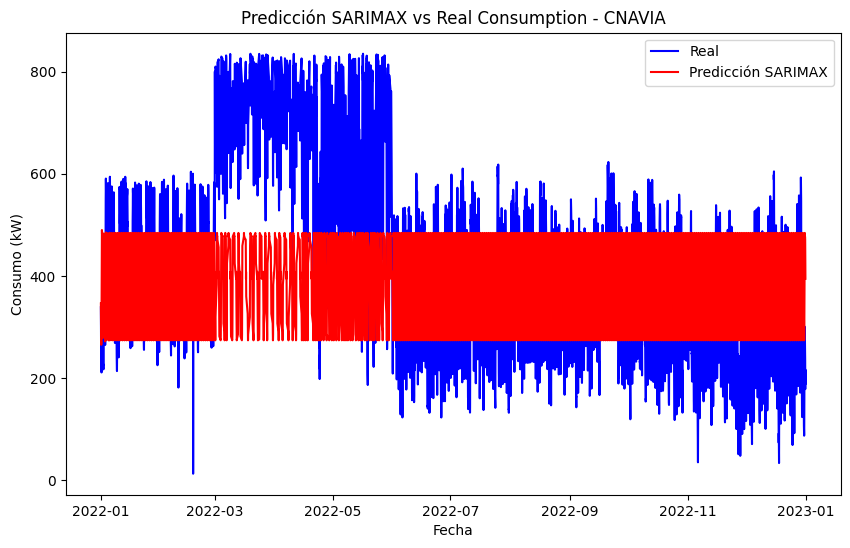

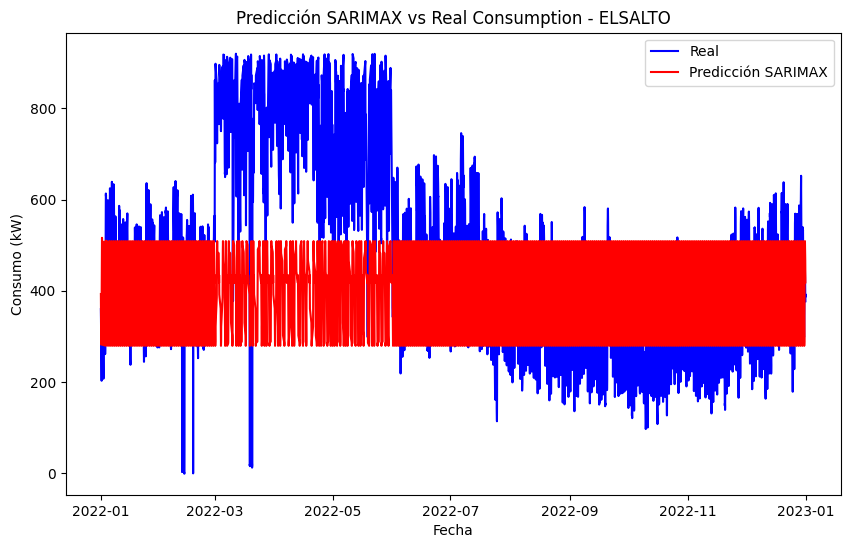

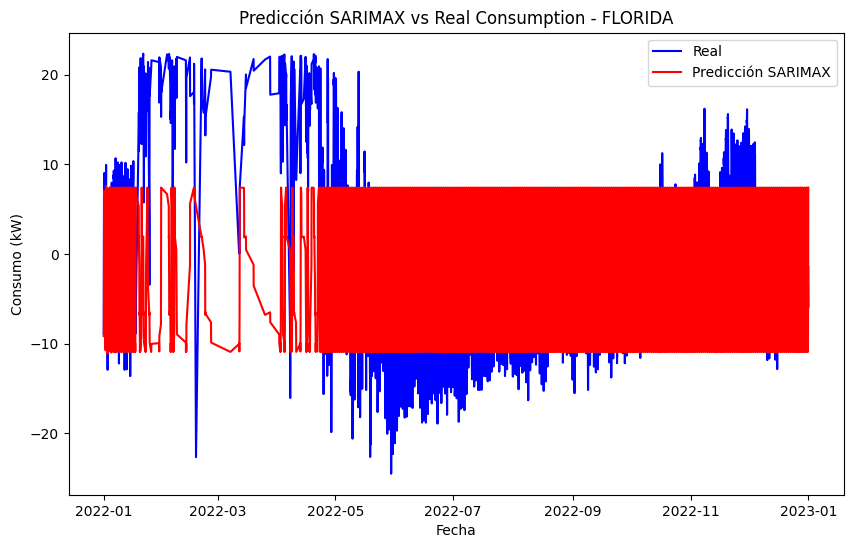

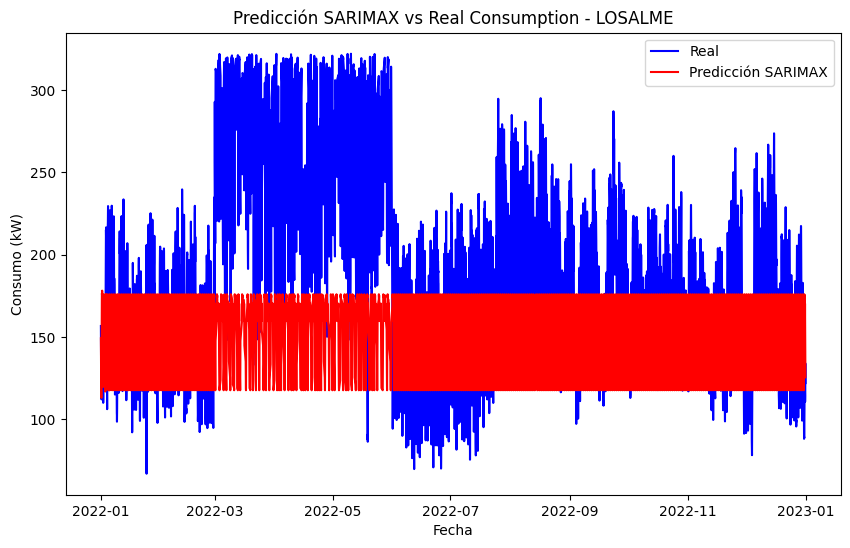

substation         MAE           MSE        RMSE
0    AJAHUEL   83.853116  12718.513312  112.776386
1       BUIN    0.276859      0.181755    0.426328
2      CHENA   66.757593   7308.201850   85.488022
3     CNAVIA  107.039546  21033.511240  145.029346
4    ELSALTO  126.890946  30372.716491  174.277699
5    FLORIDA    7.835422    104.945417   10.244287
6    LOSALME   46.279118   3693.333015   60.772798

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

results_sarimax = []

p, d, q = 1, 0, 1
P, D, Q = 1, 1, 0
s = 24

for sub in unique_subs:
    df_train = train_by_substation[sub]

    model = SARIMAX(df_train['consumption'], order=(p, d, q), seasonal_order=(P, D, Q, s))
    model_fit = model.fit(disp=False)

    df_test = test_by_substation[sub]

    predictions = model_fit.forecast(steps=len(df_test))

    mae = mean_absolute_error(df_test['consumption'], predictions)
    mse = mean_squared_error(df_test['consumption'], predictions)
    rmse = np.sqrt(mse)

    results_sarimax.append({
        'substation': sub,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

    plt.figure(figsize=(10, 6))
    plt.plot(df_test['date'], df_test['consumption'], label='Real', color='blue')
    plt.plot(df_test['date'], predictions, label='Predicción SARIMAX', color='red')
    plt.title(f"Predicción SARIMAX vs Real Consumption - {sub}")
    plt.xlabel("Fecha")
    plt.ylabel("Consumo (kW)")
    plt.legend()
    plt.show()

results_sarimax_df = pd.DataFrame(results_sarimax)
display(results_sarimax_df)

In [ ]:
################# tratamiento más arduo a outliers #################

In [24]:
from scipy.stats import zscore

def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_filtered

def remove_outliers_zscore(df, column_name, threshold=3):

    df['zscore'] = zscore(df[column_name])

    df_filtered = df[df['zscore'].abs() <= threshold]
    
    return df_filtered

for sub in unique_subs:

    df_train_sub = train_by_substation[sub]

    df_train_filtered = remove_outliers_iqr(df_train_sub, 'consumption')

    df_train_cleaned = remove_outliers_zscore(df_train_filtered, 'consumption')

    train_by_substation[sub] = df_train_cleaned

    df_test_sub = test_by_substation[sub]

    df_test_filtered = remove_outliers_iqr(df_test_sub, 'consumption')

    df_test_cleaned = remove_outliers_zscore(df_test_filtered, 'consumption')

    test_by_substation[sub] = df_test_cleaned

In [ ]:
##################### ARIMA ################

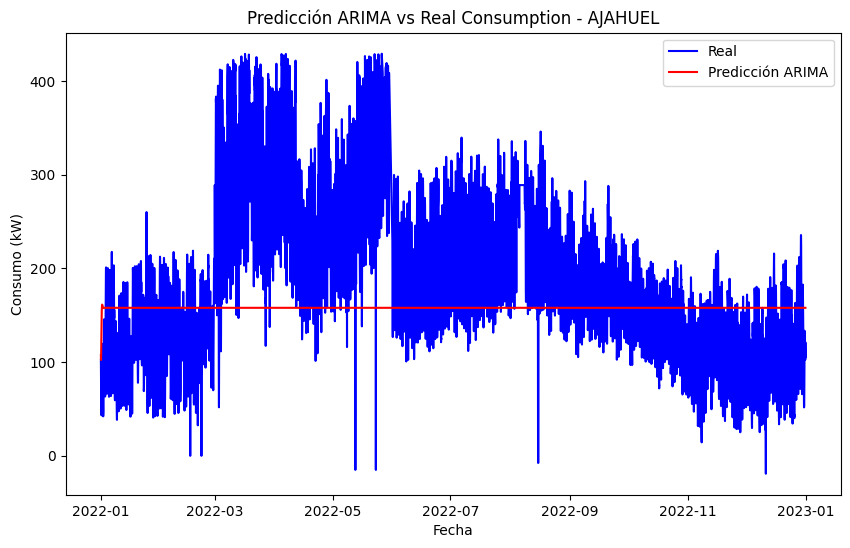

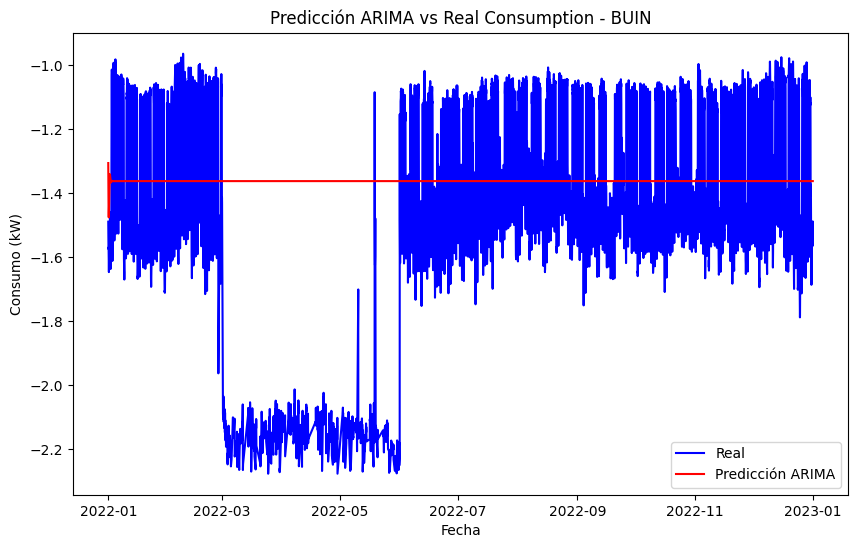

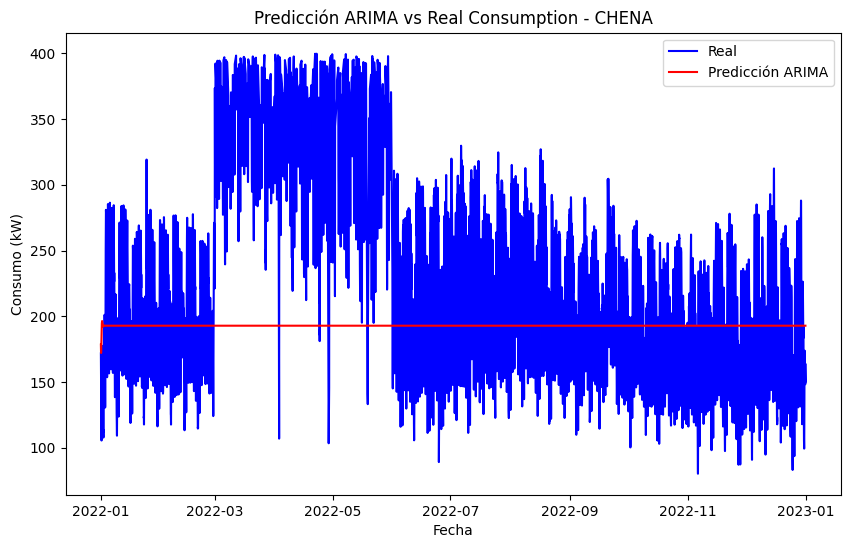

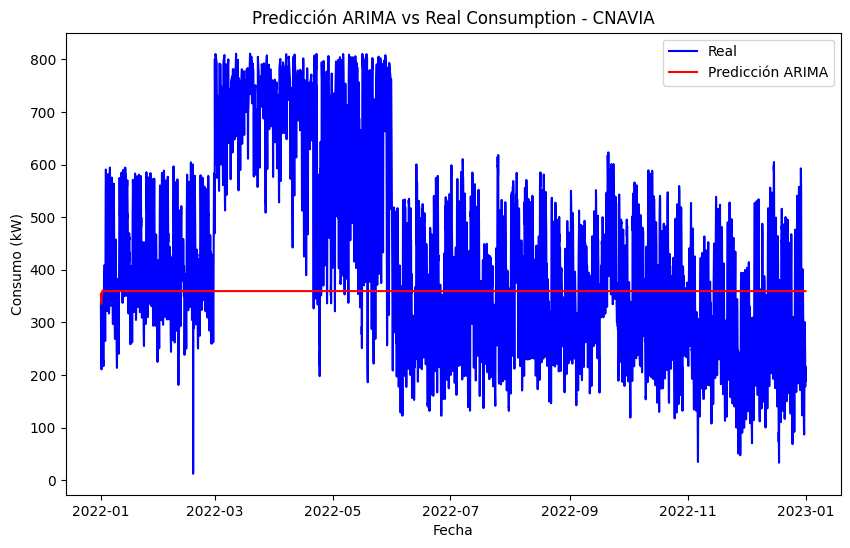

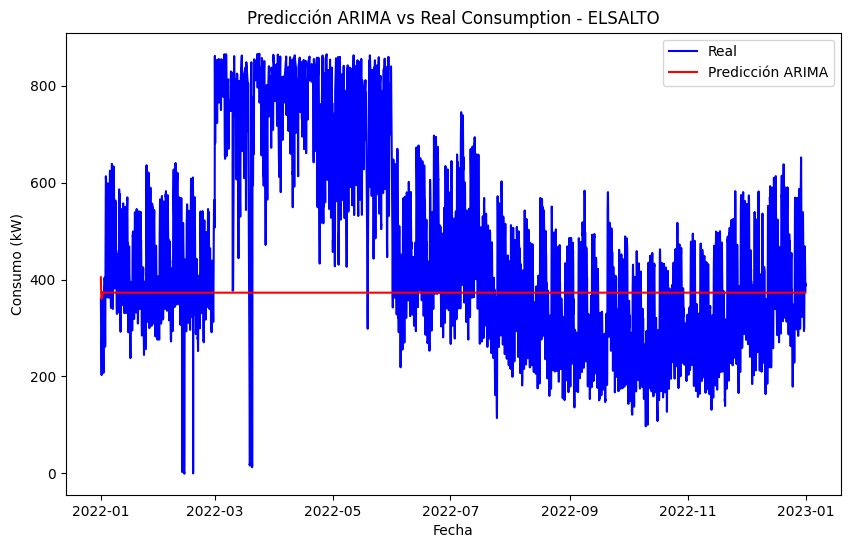

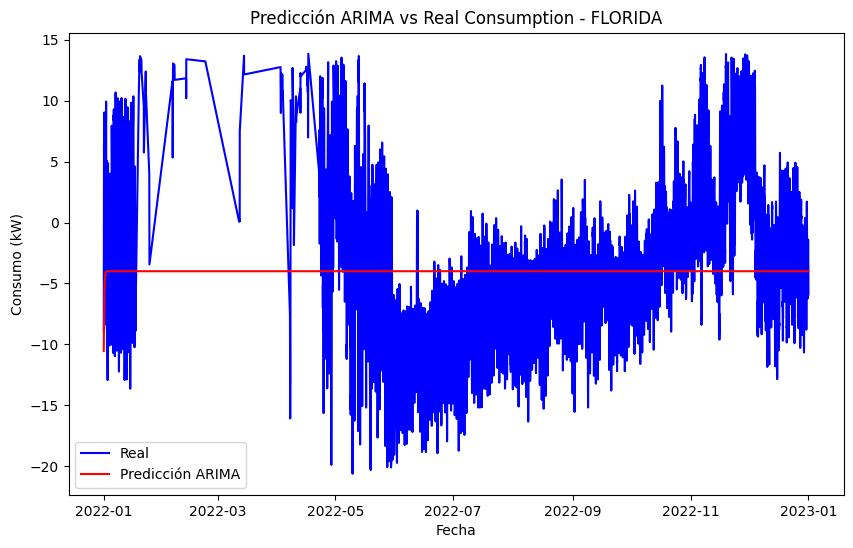

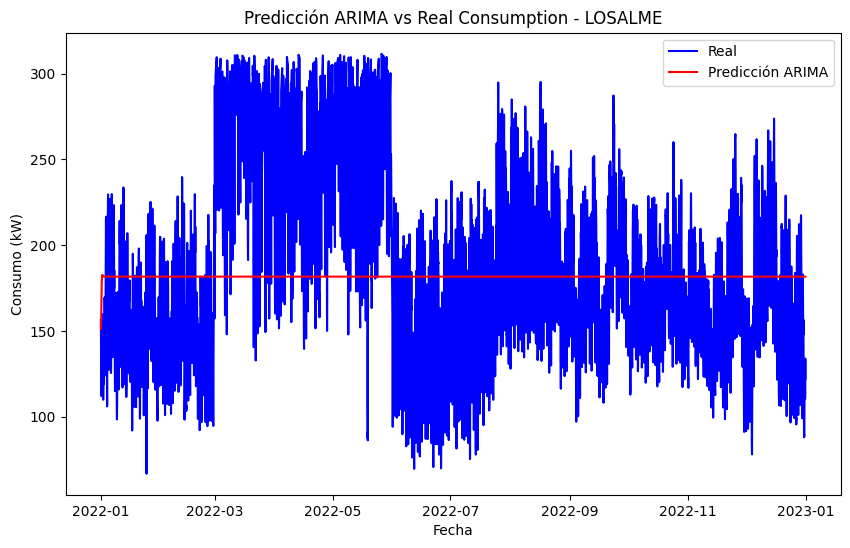

substation         MAE           MSE        RMSE
0    AJAHUEL   71.359909   8723.811033   93.401344
1       BUIN    0.264996      0.112338    0.335168
2      CHENA   54.862530   4818.426410   69.414886
3     CNAVIA  123.037605  24318.421704  155.943649
4    ELSALTO  132.944820  29720.656485  172.396800
5    FLORIDA    5.085377     41.963114    6.477894
6    LOSALME   38.500292   2288.917107   47.842629

In [25]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

results_arima = []

p, d, q = 2, 0, 2 

for sub in unique_subs:

    df_train = train_by_substation[sub]

    model = ARIMA(df_train['consumption'], order=(p, d, q))
    model_fit = model.fit()

    df_test = test_by_substation[sub]

    predictions = model_fit.forecast(steps=len(df_test))

    mae = mean_absolute_error(df_test['consumption'], predictions)
    mse = mean_squared_error(df_test['consumption'], predictions)
    rmse = np.sqrt(mse)

    results_arima.append({
        'substation': sub,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

    plt.figure(figsize=(10, 6))
    plt.plot(df_test['date'], df_test['consumption'], label='Real', color='blue')
    plt.plot(df_test['date'], predictions, label='Predicción ARIMA', color='red')
    plt.title(f"Predicción ARIMA vs Real Consumption - {sub}")
    plt.xlabel("Fecha")
    plt.ylabel("Consumo (kW)")
    plt.legend()
    plt.show()

results_arima_df = pd.DataFrame(results_arima)
display(results_arima_df)

In [ ]:
################ SARIMAX ################

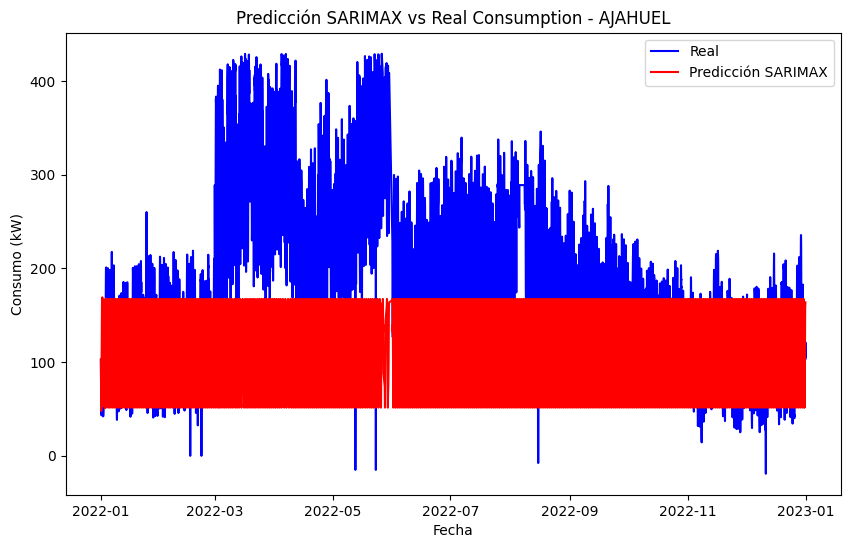

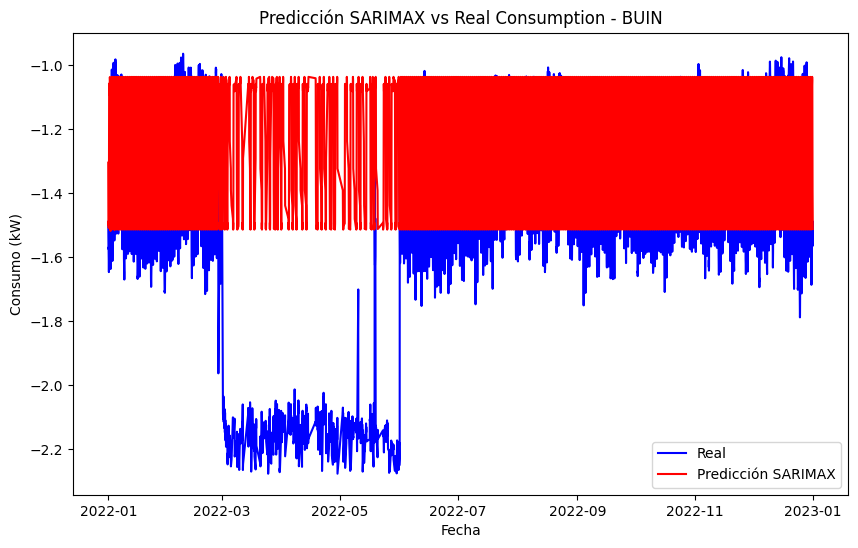

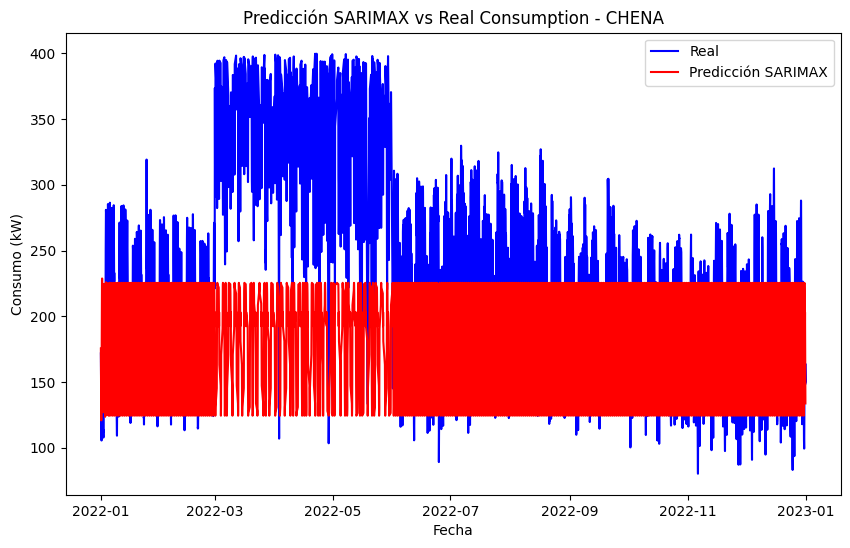

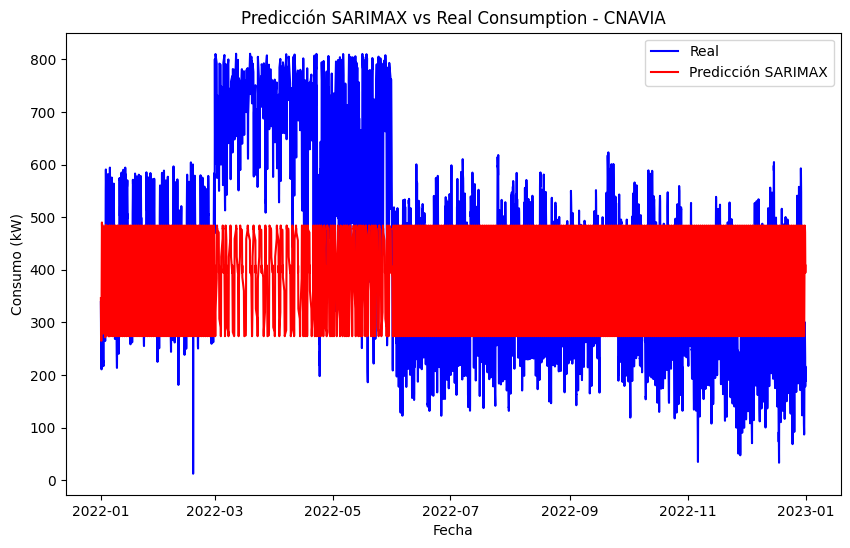

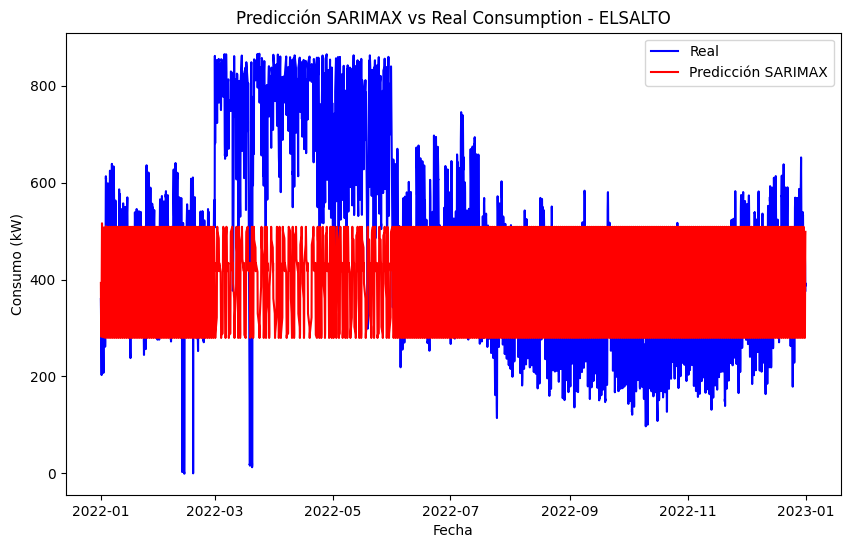

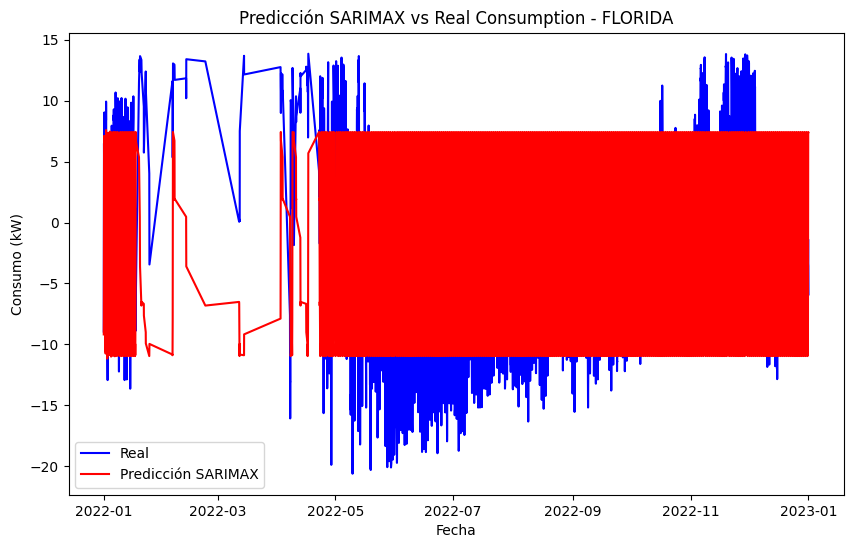

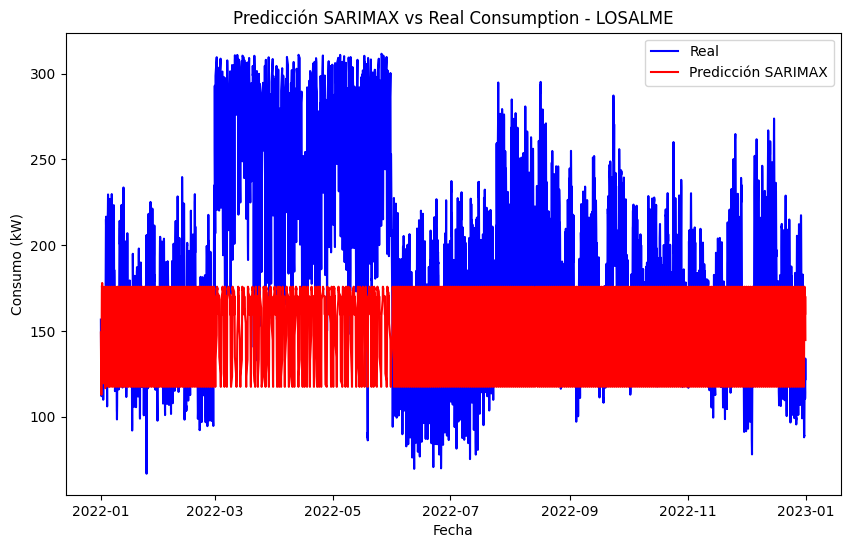

substation         MAE           MSE        RMSE
0    AJAHUEL   93.445448  15077.948775  122.792299
1       BUIN    0.274154      0.160508    0.400634
2      CHENA   57.956413   5791.201695   76.099945
3     CNAVIA   97.957097  17986.013444  134.111944
4    ELSALTO  154.955520  37272.362844  193.060516
5    FLORIDA    6.982795     80.221429    8.956642
6    LOSALME   42.081287   3100.318606   55.680505

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

results_sarimax = []

p, d, q = 1, 0, 1
P, D, Q = 1, 1, 0
s = 24

for sub in unique_subs:
    df_train = train_by_substation[sub]

    model = SARIMAX(df_train['consumption'], order=(p, d, q), seasonal_order=(P, D, Q, s))
    model_fit = model.fit(disp=False)

    df_test = test_by_substation[sub]

    predictions = model_fit.forecast(steps=len(df_test))

    mae = mean_absolute_error(df_test['consumption'], predictions)
    mse = mean_squared_error(df_test['consumption'], predictions)
    rmse = np.sqrt(mse)

    results_sarimax.append({
        'substation': sub,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

    plt.figure(figsize=(10, 6))
    plt.plot(df_test['date'], df_test['consumption'], label='Real', color='blue')
    plt.plot(df_test['date'], predictions, label='Predicción SARIMAX', color='red')
    plt.title(f"Predicción SARIMAX vs Real Consumption - {sub}")
    plt.xlabel("Fecha")
    plt.ylabel("Consumo (kW)")
    plt.legend()
    plt.show()

results_sarimax_df = pd.DataFrame(results_sarimax)
display(results_sarimax_df)